In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.options.display.max_rows = 100
plt.figure(figsize =(12,6))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [2]:
#Reading the data

df = pd.read_csv('/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv')
df.head(10)

Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   
5             Argentina          ARG   Latin America & Caribbean   
6               Armenia          ARM       Europe & Central Asia   
7        American Samoa          ASM         East Asia & Pacific   
8   Antigua and Barbuda          ATG   Latin America & Caribbean   
9             Australia          AUS         East Asia & Pacific   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                   56.308000   
1  Lower middle income  2001                   47.059000   
2  Upper middle income  2001                   74.288000   
3          High income  2001                         NaN   
4          High income  2001                   74.544000   
5  Upper middle income  2001                   73.755000   
6  Upper middle income  2001                   71.800000   
7  Upper middle income  2001                         NaN   
8          High income  2001                   74.171000   
9          High income  2001                   79.634146   

   Prevelance of Undernourishment       CO2  Health Expenditure %  \
0                            47.8     730.0                   NaN   
1                            67.5   15960.0              4.483516   
2                             4.9    3230.0              7.139524   
3                             NaN     520.0              5.865939   
4                             2.8   97200.0              2.484370   
5                             3.0  125260.0              8.371798   
6                            26.1    3600.0              4.645627   
7                             NaN       NaN                   NaN   
8                             NaN     350.0              5.435876   
9                             2.5  345640.0              7.696229   

   Education Expenditure %  Unemployment  Corruption  Sanitation    Injuries  \
0                      NaN     10.809000         NaN         NaN  2179727.10   
1                      NaN      4.004000         NaN         NaN  1392080.71   
2                  3.45870     18.575001         NaN   40.520895   117081.67   
3                      NaN           NaN         NaN   21.788660     1697.99   
4                      NaN      2.493000         NaN         NaN   144678.14   
5                  4.83374     17.320000         NaN   48.053996  1397676.07   
6                  2.46944     10.912000         NaN   46.351896   103371.75   
7                      NaN           NaN         NaN         NaN     1683.98   
8                      NaN           NaN         NaN         NaN     2201.12   
9                      NaN      6.740000         NaN   58.788894   612233.81   

   Communicable  NonCommunicable  
0    9689193.70       5795426.38  
1   11190210.53       2663516.34  
2     140894.78        532324.75  
3        695.56         13636.64  
4      65271.91        481740.70  
5    1507068.98       8070909.52  
6     122238.13        767916.19  
7       2933.98         10752.13  
8       3279.72         14289.69  
9     208282.73       4158052.86

In [3]:
df.shape 

(3306, 16)

In [4]:
df.info() # it displays columns and its dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [5]:
df.isnull().sum()/len(df)*100 

Country Name                       0.000000
Country Code                       0.000000
Region                             0.000000
IncomeGroup                        0.000000
Year                               0.000000
Life Expectancy World Bank         5.686630
Prevelance of Undernourishment    20.689655
CO2                                4.597701
Health Expenditure %               5.444646
Education Expenditure %           32.970357
Unemployment                       9.195402
Corruption                        70.508167
Sanitation                        37.719298
Injuries                           0.000000
Communicable                       0.000000
NonCommunicable                    0.000000
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace = True)

**As we can see that in the data, In feature column 'corruption' has Null values, so,we can drop them.**

In [8]:
df.drop('Corruption',inplace =True, axis =1)

In [9]:
df.head(5)

Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                             4.9   3230.0              7.139524   
3                             NaN    520.0              5.865939   
4                             2.8  97200.0              2.484370   

   Education Expenditure %  Unemployment  Sanitation    Injuries  \
0                      NaN     10.809000         NaN  2179727.10   
1                      NaN      4.004000         NaN  1392080.71   
2                   3.4587     18.575001   40.520895   117081.67   
3                      NaN           NaN   21.788660     1697.99   
4                      NaN      2.493000         NaN   144678.14   

   Communicable  NonCommunicable  
0    9689193.70       5795426.38  
1   11190210.53       2663516.34  
2     140894.78        532324.75  
3        695.56         13636.64  
4      65271.91        481740.70

In [12]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Country_Name', 'Country_Code', 'Region', 'IncomeGroup', 'Year',
       'Life_Expectancy_World_Bank', 'Prevelance_of_Undernourishment', 'CO2',
       'Health_Expenditure_%', 'Education_Expenditure_%', 'Unemployment',
       'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable'],
      dtype='object')

In [13]:
df


Country_Name Country_Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              IncomeGroup  Year  Life_Expectancy_World_Bank  \
0              Low income  2001                      56.308   
1     Lower middle income  2001                      47.059   
2     Upper middle income  2001                      74.288   
3             High income  2001                         NaN   
4             High income  2001                      74.544   
...                   ...   ...                         ...   
3301  Lower middle income  2019                      70.474   
3302  Lower middle income  2019                      73.321   
3303  Upper middle income  2019                      64.131   
3304           Low income  2019                      63.886   
3305  Lower middle income  2019                      61.490   

      Prevelance_of_Undernourishment            CO2  Health_Expenditure_%  \
0                               47.8     730.000000                   NaN   
1                               67.5   15960.000000              4.483516   
2                                4.9    3230.000000              7.139524   
3                                NaN     520.000000              5.865939   
4                                2.8   97200.000000              2.484370   
...                              ...            ...                   ...   
3301                            12.4     209.999993              3.360347   
3302                             4.4     300.000012              6.363094   
3303                             6.3  439640.014648              9.109355   
3304                             NaN    6800.000191              5.312203   
3305                             NaN   11760.000229              7.703565   

      Education_Expenditure_%  Unemployment  Sanitation    Injuries  \
0                         NaN     10.809000         NaN  2179727.10   
1                         NaN      4.004000         NaN  1392080.71   
2                     3.45870     18.575001   40.520895   117081.67   
3                         NaN           NaN   21.788660     1697.99   
4                         NaN      2.493000         NaN   144678.14   
...                       ...           ...         ...         ...   
3301                  1.77788      1.801000         NaN    12484.18   
3302                  4.70625      8.406000   47.698788     6652.84   
3303                  5.91771     28.469999         NaN  3174676.10   
3304                  4.46518     12.520000         NaN   510982.75   
3305                      NaN      4.833000   25.963544   644798.93   

      Communicable  NonCommunicable  
0       9689193.70       5795426.38  
1      11190210.53       2663516.34  
2        140894.78        532324.75  
3           695.56         13636.64  
4         65271.91        481740.70  
...            ...              ...  
3301      26032.56         69213.56  
3302       9095.19         43798.62  
3303   13198944.71      10214261.89  
3304    4837094.00       2649687.82  
3305    4187087.31       2364031.48  

[3306 rows x 15 columns]

In [14]:
## Checking Missing Values
null =[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        null.append(i)
        
print(null)


['Life_Expectancy_World_Bank', 'Prevelance_of_Undernourishment', 'CO2', 'Health_Expenditure_%', 'Education_Expenditure_%', 'Unemployment', 'Sanitation']


In [15]:
for i in null:
    df[i] = df[i].fillna(method ='ffill')
    #df[i] = df[i].fillna(np.mean(df[i]))

In [16]:
df.isnull().sum()

Country_Name                      0
Country_Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life_Expectancy_World_Bank        0
Prevelance_of_Undernourishment    0
CO2                               0
Health_Expenditure_%              1
Education_Expenditure_%           2
Unemployment                      0
Sanitation                        2
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [17]:
df.dropna(axis =0,inplace=True) # drop rows have null values

In [18]:
df.isnull().sum()

Country_Name                      0
Country_Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life_Expectancy_World_Bank        0
Prevelance_of_Undernourishment    0
CO2                               0
Health_Expenditure_%              0
Education_Expenditure_%           0
Unemployment                      0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [19]:
df.describe().T #it gives count,mean,standaed deviation,min,max...

count          mean           std  \
Year                            3304.0  2.010005e+03  5.475233e+00   
Life_Expectancy_World_Bank      3304.0  6.983790e+01  9.205241e+00   
Prevelance_of_Undernourishment  3304.0  1.053901e+01  1.079301e+01   
CO2                             3304.0  1.526057e+05  7.555113e+05   
Health_Expenditure_%            3304.0  6.350876e+00  2.802961e+00   
Education_Expenditure_%         3304.0  4.515689e+00  2.149309e+00   
Unemployment                    3304.0  8.221002e+00  6.550823e+00   
Sanitation                      3304.0  5.406509e+01  2.974724e+01   
Injuries                        3304.0  1.317936e+06  5.215625e+06   
Communicable                    3304.0  4.682806e+06  1.844230e+07   
NonCommunicable                 3304.0  7.394403e+06  2.933563e+07   

                                        min            25%           50%  \
Year                            2001.000000    2005.000000  2.010000e+03   
Life_Expectancy_World_Bank        40.369000      64.017500  7.217150e+01   
Prevelance_of_Undernourishment     2.500000       2.500000  6.300000e+00   
CO2                               10.000000    2007.499993  1.015000e+04   
Health_Expenditure_%               1.263576       4.243096  5.911260e+00   
Education_Expenditure_%            0.850320       3.060900  4.242305e+00   
Unemployment                       0.100000       3.758250  6.150000e+00   
Sanitation                         2.377647      26.339479  5.111641e+01   
Injuries                         430.490000   62220.940000  2.452339e+05   
Communicable                     330.160000   57639.987500  3.146752e+05   
NonCommunicable                 2481.820000  318414.757500  1.349070e+06   

                                         75%           max  
Year                            2.015000e+03  2.019000e+03  
Life_Expectancy_World_Bank      7.656200e+01  8.435634e+01  
Prevelance_of_Undernourishment  1.420000e+01  7.090000e+01  
CO2                             5.775500e+04  1.070722e+07  
Health_Expenditure_%            8.085888e+00  2.423068e+01  
Education_Expenditure_%         5.484470e+00  2.327000e+01  
Unemployment                    1.055275e+01  3.725000e+01  
Sanitation                      8.093472e+01  1.000000e+02  
Injuries                        8.449277e+05  5.563676e+07  
Communicable                    2.823499e+06  2.685646e+08  
NonCommunicable                 3.917548e+06  3.246378e+08

## Targeted Feature(Life Expectancy) - Continous Column

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Count'>

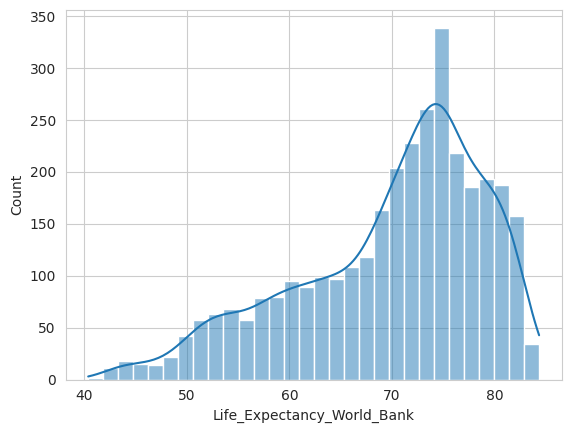

In [20]:
sns.histplot (data =df, x='Life_Expectancy_World_Bank',bins=30,kde=True)

**Conlusion**: As the above plot shows Life Expectancy is between 70 to 80

## Year (Continous Column)

<Axes: xlabel='Year', ylabel='Count'>

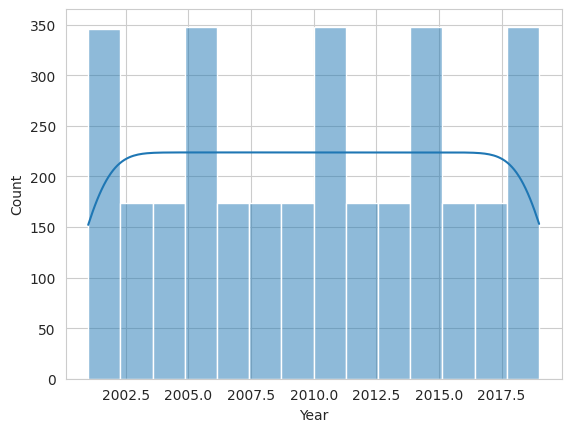

In [21]:
sns.histplot(data=df, x='Year',kde =True)

<Axes: xlabel='Year'>

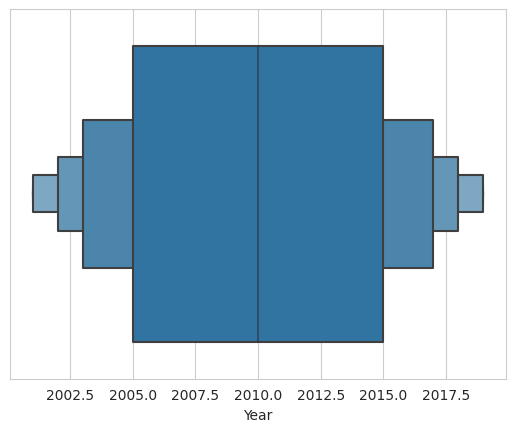

In [22]:
sns.boxenplot(data=df,x ='Year')

**Conclusion**: The plot shows the data is from year 2005 to 2015

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Count'>

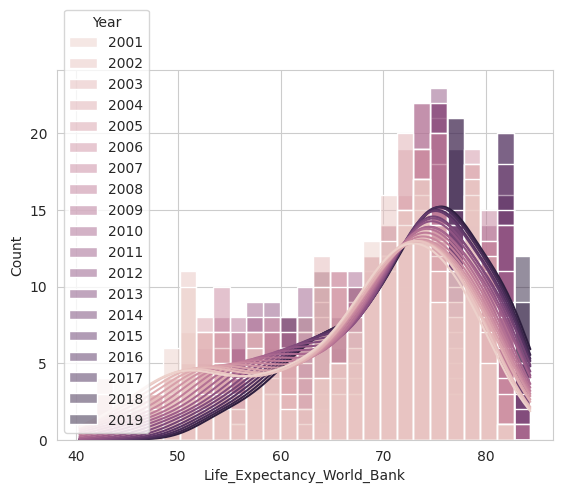

In [23]:
sns.histplot(data=df, hue = 'Year',kde =True,x ='Life_Expectancy_World_Bank')

[Text(2000.0, 0, '2001'),
 Text(2002.5, 0, '2002'),
 Text(2005.0, 0, '2003'),
 Text(2007.5, 0, '2004'),
 Text(2010.0, 0, '2005'),
 Text(2012.5, 0, '2006'),
 Text(2015.0, 0, '2007'),
 Text(2017.5, 0, '2008'),
 Text(2020.0, 0, '2009')]

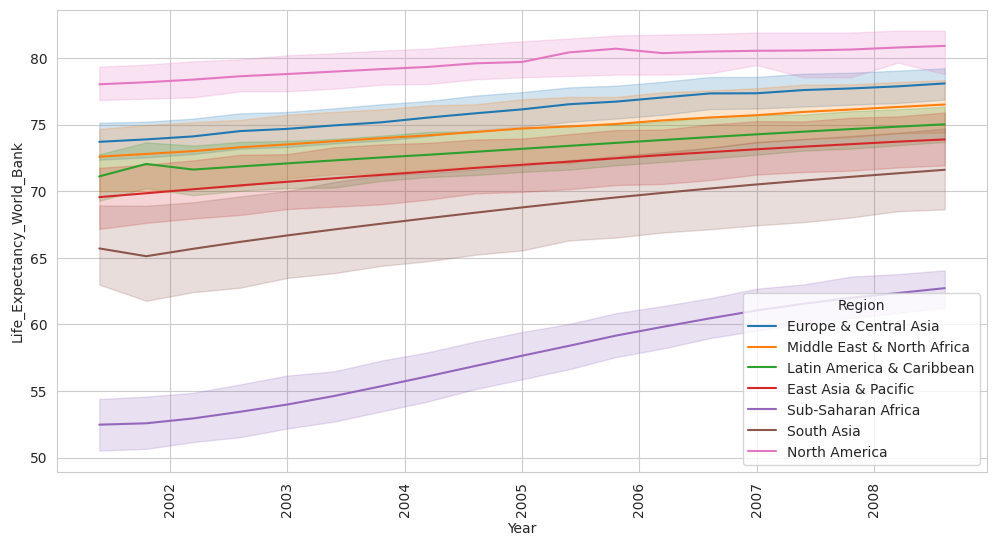

In [42]:
#sns.lineplot(data=df,x='Year',y='Life_Expectancy_World_Bank')
fig,ax = plt.subplots(figsize =(12,6))
sns.lineplot(data=df,x='Year',y='Life_Expectancy_World_Bank',hue='Region')
ax.set_xticklabels(df.Year.unique(),rotation =90)

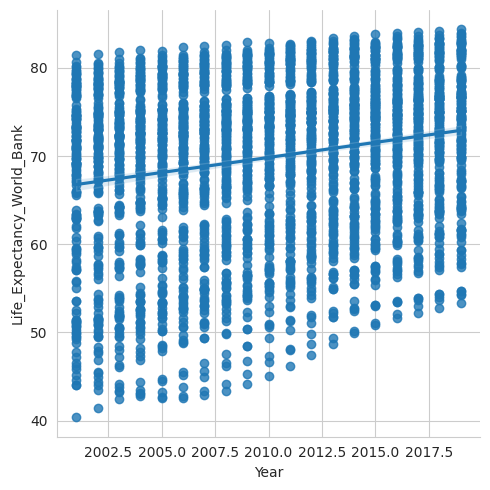

In [25]:
#sns.lmplot(data=df,x='Year',y='Life_Expectancy_World_Bank')

In [24]:
#df.groupby('Year')['Life_Expectancy_World_Bank'].nunique()

Year
2001    162
2002    165
2003    164
2004    164
2005    165
2006    162
2007    164
2008    164
2009    163
2010    163
2011    162
2012    162
2013    164
2014    163
2015    164
2016    163
2017    164
2018    164
2019    164
Name: Life_Expectancy_World_Bank, dtype: int64

[Text(0, 0, '2001'),
 Text(1, 0, '2002'),
 Text(2, 0, '2003'),
 Text(3, 0, '2004'),
 Text(4, 0, '2005'),
 Text(5, 0, '2006'),
 Text(6, 0, '2007'),
 Text(7, 0, '2008'),
 Text(8, 0, '2009'),
 Text(9, 0, '2010'),
 Text(10, 0, '2011'),
 Text(11, 0, '2012'),
 Text(12, 0, '2013'),
 Text(13, 0, '2014'),
 Text(14, 0, '2015'),
 Text(15, 0, '2016'),
 Text(16, 0, '2017'),
 Text(17, 0, '2018'),
 Text(18, 0, '2019')]

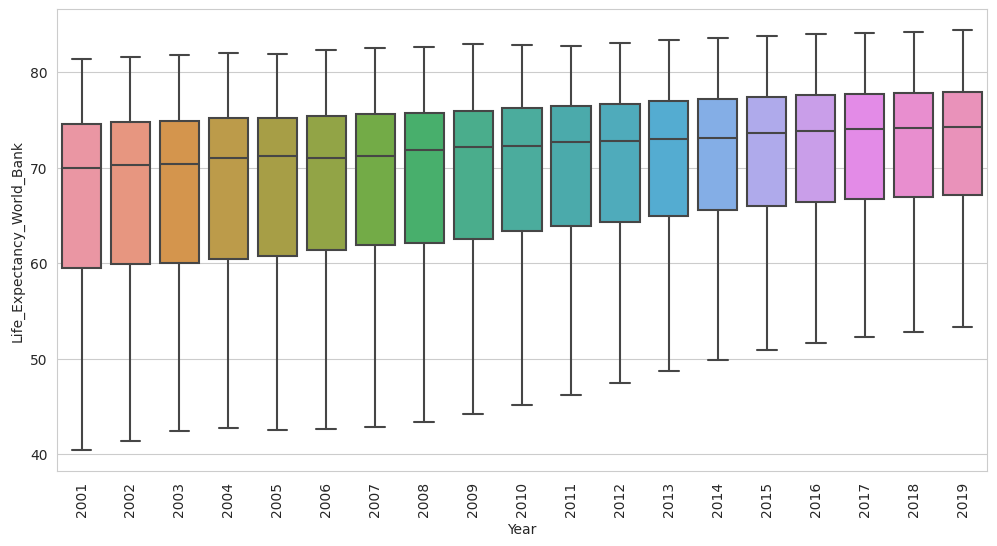

In [26]:
#fig,ax =plt.subplots(figsize=(12,6))
#sns.boxplot(data=df,x='Year',y='Life_Expectancy_World_Bank')
#ax.set_xticklabels(df.Year.unique(),rotation =90)

[Text(2000.0, 0, '2001'),
 Text(2002.5, 0, '2002'),
 Text(2005.0, 0, '2003'),
 Text(2007.5, 0, '2004'),
 Text(2010.0, 0, '2005'),
 Text(2012.5, 0, '2006'),
 Text(2015.0, 0, '2007'),
 Text(2017.5, 0, '2008'),
 Text(2020.0, 0, '2009')]

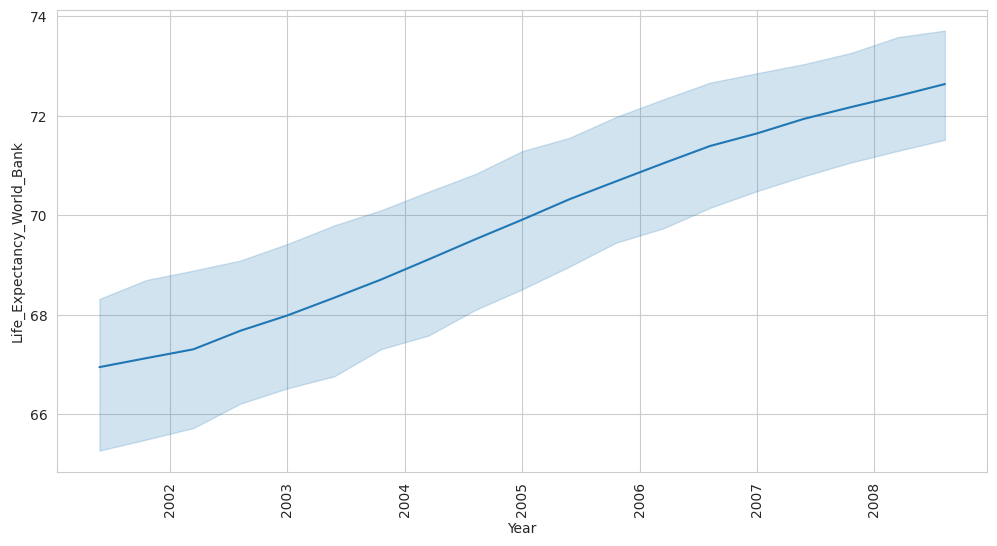

In [27]:
#fig,ax=plt.subplots(figsize=(12,6))
#sns.lineplot(data=df,x='Year',y='Life_Expectancy_World_Bank')
#ax.set_xticklabels(df.Year.unique(),rotation =90) 

**conlusion**: As we can see that Life Expectancy has been increasing year after year in Sub-Saharan Africa

## CO2

<Axes: xlabel='CO2', ylabel='Count'>

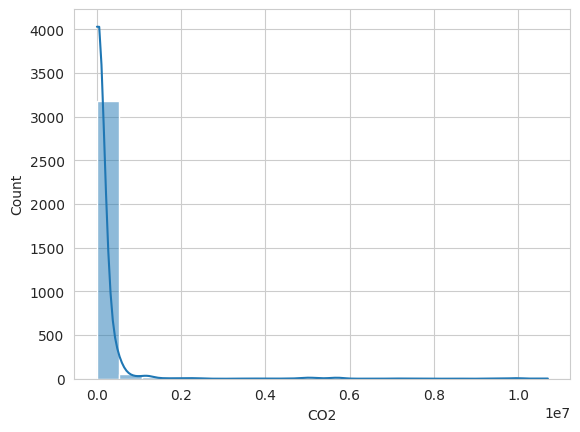

In [28]:
sns.histplot(data=df,x='CO2',bins = 20, kde= True)

<Axes: xlabel='CO2'>

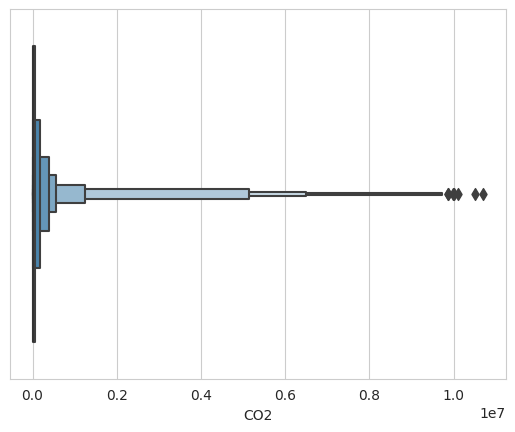

In [29]:
sns.boxenplot(data=df,x='CO2')

In [30]:
df['CO2']= np.log(df['CO2'])

[Text(30.0, 0, '74.288'),
 Text(40.0, 0, '74.544'),
 Text(50.0, 0, '73.755'),
 Text(60.0, 0, '71.8'),
 Text(70.0, 0, '74.171'),
 Text(80.0, 0, '79.63414634146342'),
 Text(90.0, 0, '78.57560975609756')]

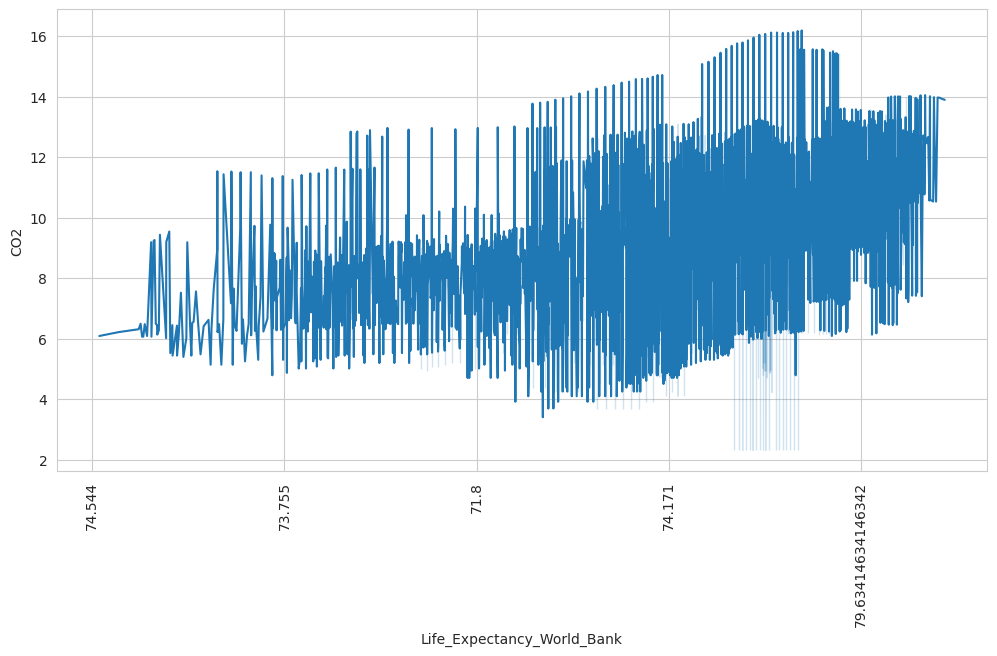

In [31]:
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df,y='CO2',x='Life_Expectancy_World_Bank')
ax.set_xticklabels(df['Life_Expectancy_World_Bank'].unique(), rotation = 90)

[Text(30.0, 0, '74.288'),
 Text(40.0, 0, '74.544'),
 Text(50.0, 0, '73.755'),
 Text(60.0, 0, '71.8'),
 Text(70.0, 0, '74.171'),
 Text(80.0, 0, '79.63414634146342'),
 Text(90.0, 0, '78.57560975609756')]

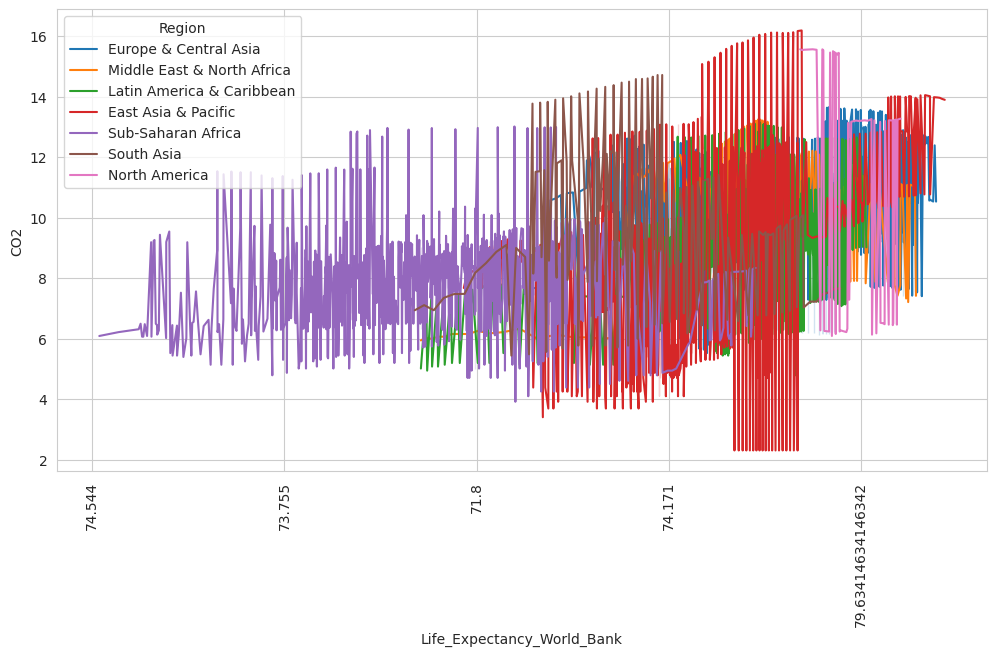

In [32]:
fig,ax= plt.subplots(figsize =(12,6))
sns.lineplot(data=df,y='CO2',x='Life_Expectancy_World_Bank',hue='Region')
ax.set_xticklabels(df['Life_Expectancy_World_Bank'].unique(),rotation =90)

<Axes: xlabel='CO2', ylabel='Life_Expectancy_World_Bank'>

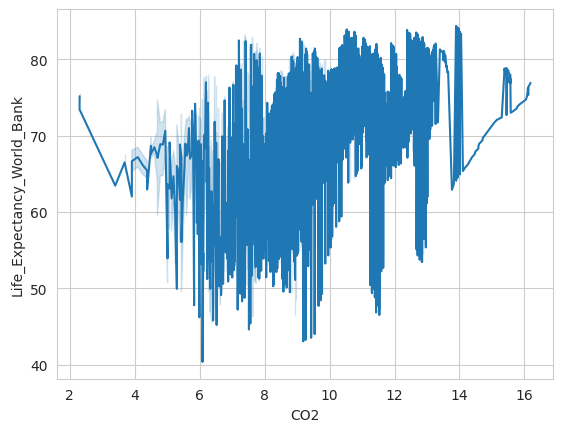

In [33]:
sns.lineplot(data=df,x='CO2',y='Life_Expectancy_World_Bank')

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='CO2'>

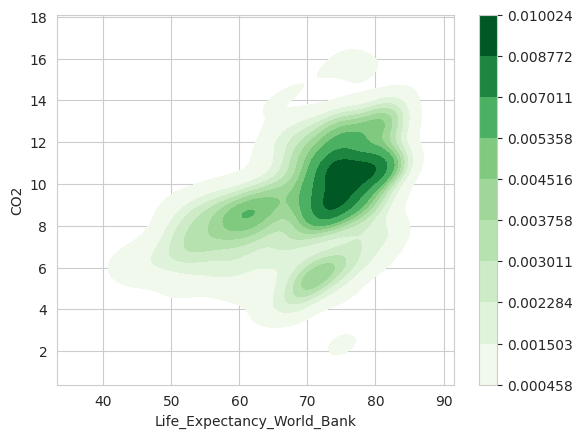

In [34]:
sns.kdeplot(data=df,x='Life_Expectancy_World_Bank',y='CO2',cmap='Greens',shade=True,cbar=True)

<Axes: xlabel='Year', ylabel='CO2'>

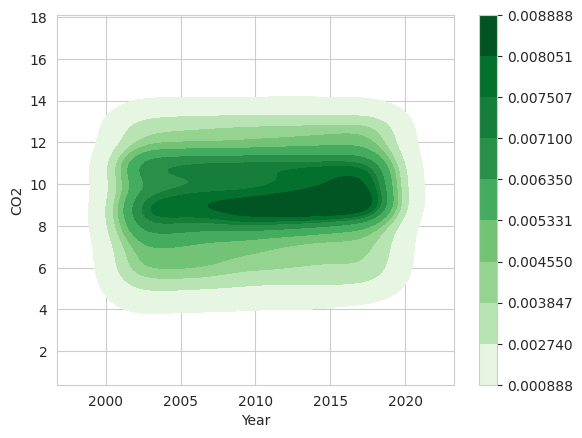

In [35]:
sns.kdeplot(data=df,x='Year',y='CO2',cmap='Greens',cbar=True,shade=True)

**Question:** Increase in CO2 emissions decrease life expectancy? Is it significant?
**Conclusion:** As we can conclude that lesser CO2 has high life expectancy between 70 - 80


## Health Expenditure %

<Axes: xlabel='Health_Expenditure_%', ylabel='Count'>

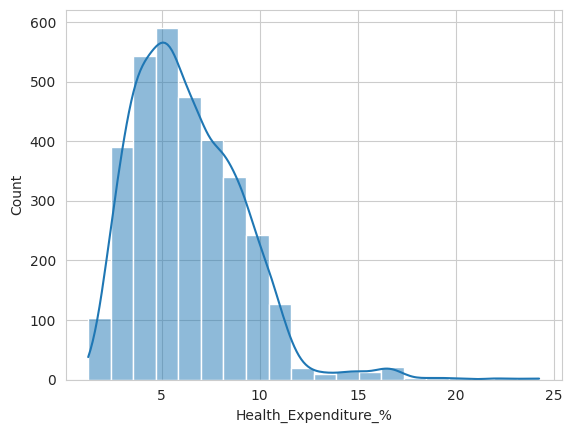

In [36]:
sns.histplot(data =df, x='Health_Expenditure_%',bins = 20, kde = True)

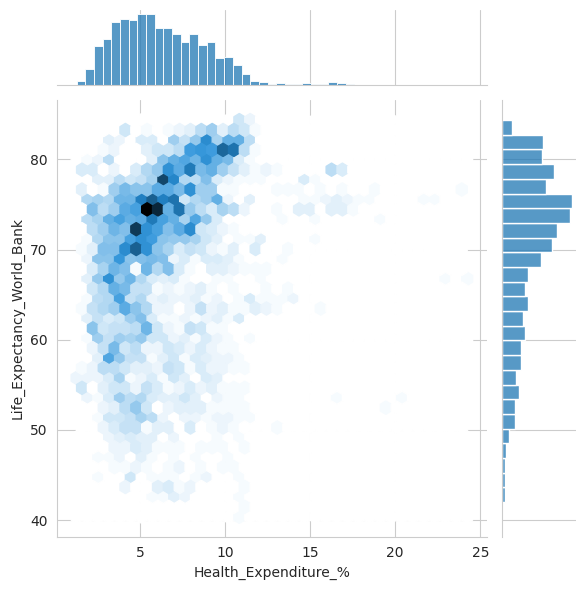

In [37]:
sns.jointplot(data=df, x='Health_Expenditure_%',y='Life_Expectancy_World_Bank',kind='hex')

[Text(0.0, 0, '7.13952398'),
 Text(5.0, 0, '5.86593914'),
 Text(10.0, 0, '2.48437047'),
 Text(15.0, 0, '8.37179756'),
 Text(20.0, 0, '4.64562702'),
 Text(25.0, 0, '5.43587589'),
 Text(30.0, 0, '7.69622898')]

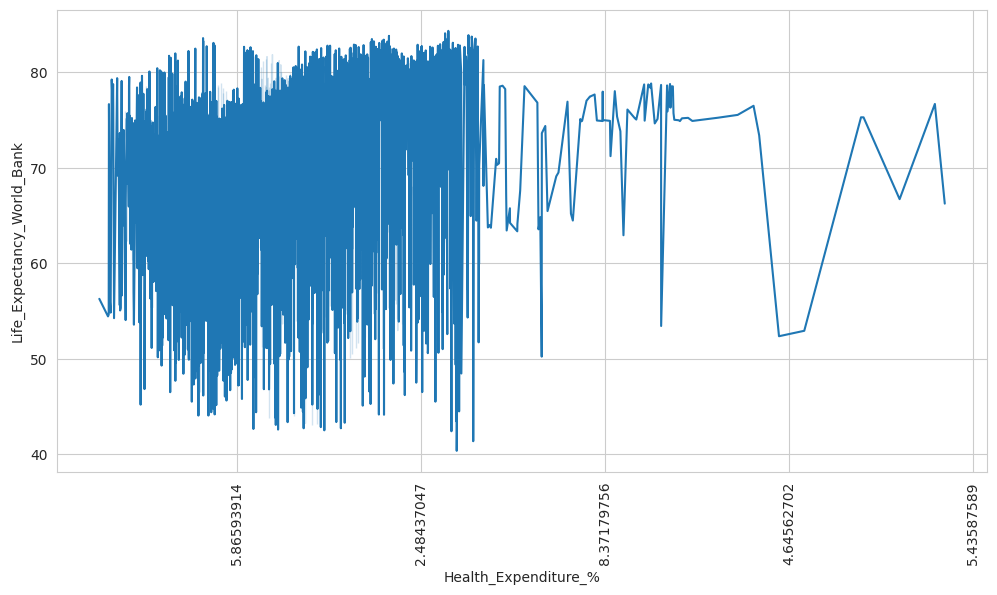

In [38]:
fig,ax =plt.subplots(figsize=(12,6))
sns.lineplot(data=df, x='Health_Expenditure_%',y='Life_Expectancy_World_Bank')
ax.set_xticklabels(df['Health_Expenditure_%'].unique(),rotation=90)

<Axes: xlabel='Health_Expenditure_%', ylabel='Life_Expectancy_World_Bank'>

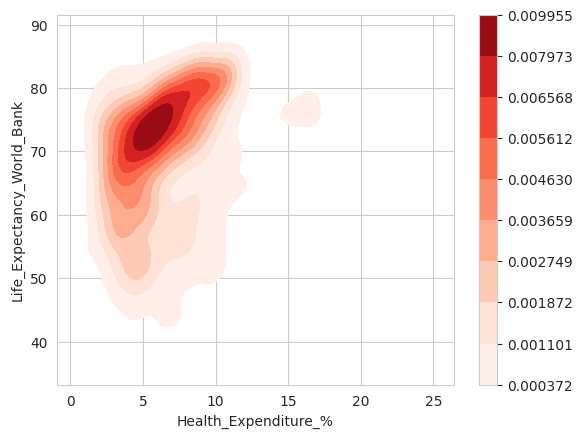

In [39]:
sns.kdeplot(data=df,x='Health_Expenditure_%',y='Life_Expectancy_World_Bank',cbar=True,cmap='Reds',shade= True)

#sns.lmplot(data=df,x='Health_Expenditure_%',y='Life_Expectancy_World_Bank')

**Question**:What’s the Impact of Expenditure on Health and Education (% of GDP) on Life Expectancy?
**Conclusion**: Health Expenditure between 5% to 10% has more Life Expectancy.Therefore, high impact on Life Expectancy

## Education Expenditure %

<Axes: xlabel='Education_Expenditure_%', ylabel='Count'>

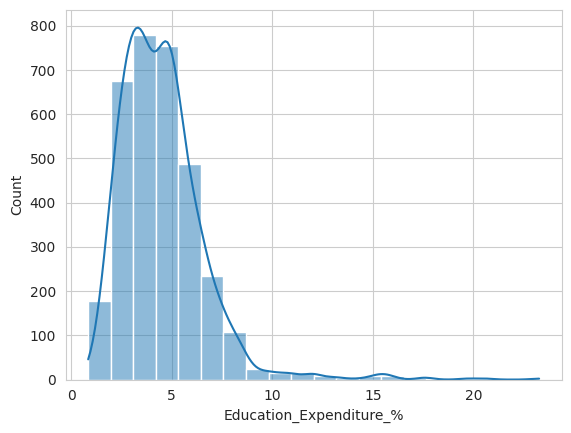

In [41]:
sns.histplot(data=df, x='Education_Expenditure_%',bins = 20,kde=True)

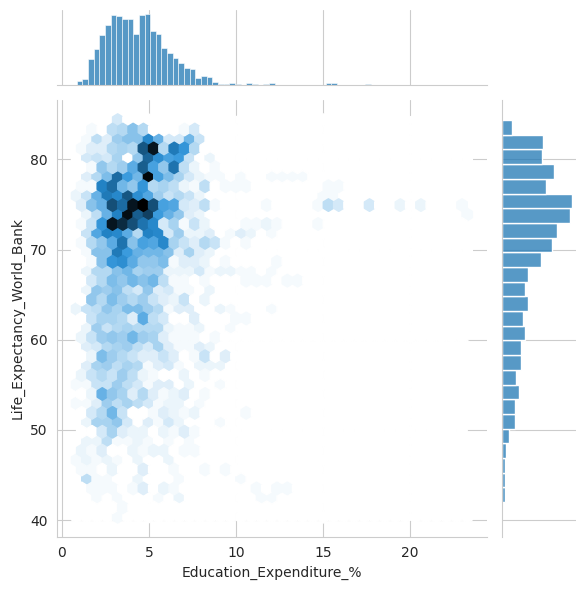

In [42]:
sns.jointplot(data = df,x = 'Education_Expenditure_%' ,y = 'Life_Expectancy_World_Bank',kind = 'hex')

[Text(-5.0, 0, '74.288'),
 Text(0.0, 0, '74.544'),
 Text(5.0, 0, '73.755'),
 Text(10.0, 0, '71.8'),
 Text(15.0, 0, '74.171'),
 Text(20.0, 0, '79.63414634146342'),
 Text(25.0, 0, '78.57560975609756')]

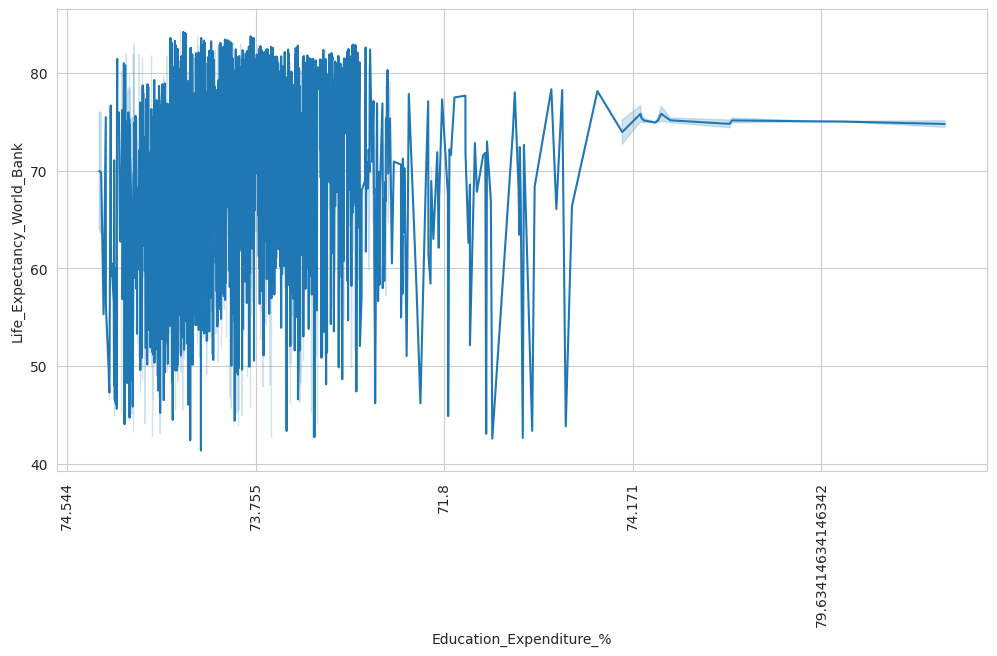

In [43]:
fig,ax =plt.subplots(figsize=(12,6))
sns.lineplot(data=df,x='Education_Expenditure_%', y = 'Life_Expectancy_World_Bank')
ax.set_xticklabels(df['Life_Expectancy_World_Bank'].unique(),rotation = 90)

[Text(-5.0, 0, '74.288'),
 Text(0.0, 0, '74.544'),
 Text(5.0, 0, '73.755'),
 Text(10.0, 0, '71.8'),
 Text(15.0, 0, '74.171'),
 Text(20.0, 0, '79.63414634146342'),
 Text(25.0, 0, '78.57560975609756')]

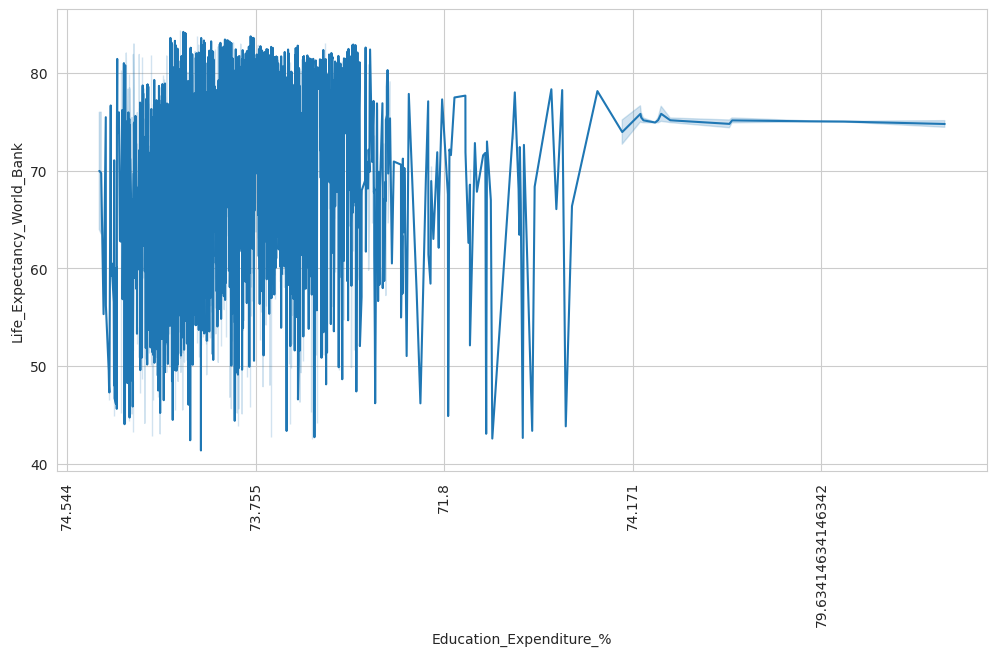

In [44]:
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df,y='Life_Expectancy_World_Bank',x='Education_Expenditure_%')
ax.set_xticklabels(df['Life_Expectancy_World_Bank'].unique(),rotation=90)

<Axes: xlabel='Education_Expenditure_%', ylabel='Life_Expectancy_World_Bank'>

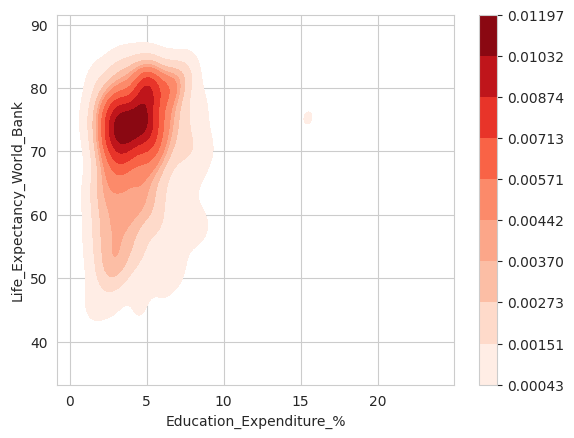

In [45]:
sns.kdeplot(data=df,y='Life_Expectancy_World_Bank',x='Education_Expenditure_%',cbar= True,cmap ='Reds',shade =True)

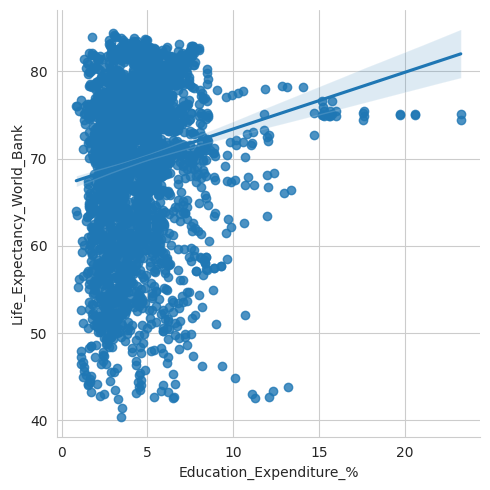

In [46]:
sns.lmplot(data=df,x='Education_Expenditure_%',y='Life_Expectancy_World_Bank')

**Conclusion**:  As we can see from the plot that Education Expenditure of around 5% has more life expectancy between 70-80.Therfore, impact on life expectancy is high.

## Unemployment 

<Axes: xlabel='Unemployment', ylabel='Count'>

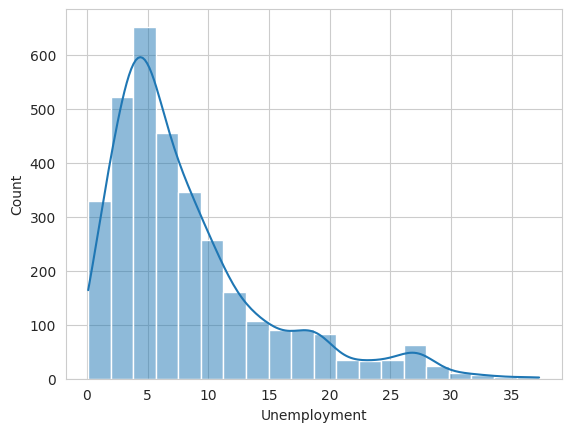

In [47]:
sns.histplot(data=df,x='Unemployment',bins=20,kde= True)

<Axes: xlabel='Unemployment'>

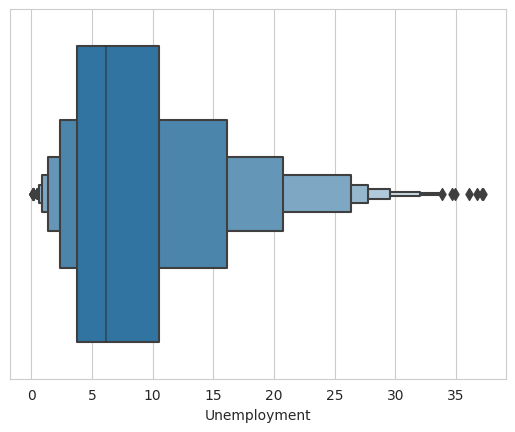

In [48]:
sns.boxenplot(data=df,x='Unemployment')

<Axes: xlabel='Unemployment', ylabel='Life_Expectancy_World_Bank'>

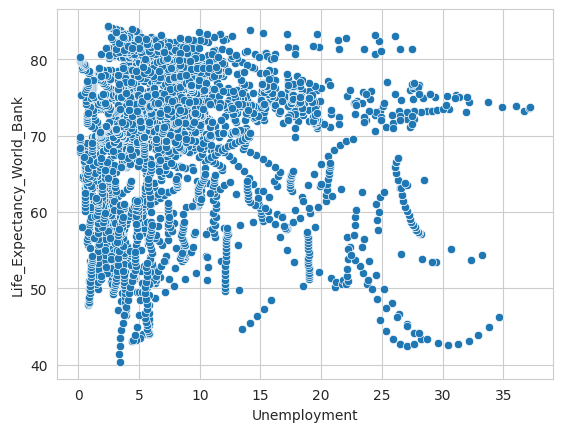

In [49]:
sns.scatterplot(data=df,x='Unemployment',y='Life_Expectancy_World_Bank')

[Text(30.0, 0, '74.288'),
 Text(40.0, 0, '74.544'),
 Text(50.0, 0, '73.755'),
 Text(60.0, 0, '71.8'),
 Text(70.0, 0, '74.171'),
 Text(80.0, 0, '79.63414634146342'),
 Text(90.0, 0, '78.57560975609756')]

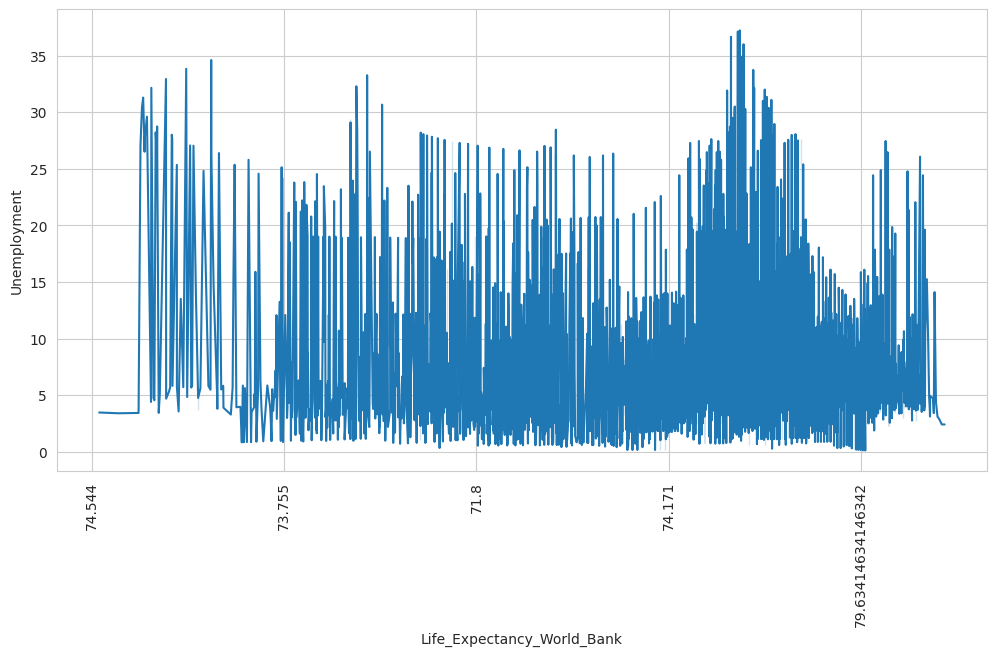

In [50]:
fig,ax =plt.subplots(figsize=(12,6))
sns.lineplot(data=df,y='Unemployment',x='Life_Expectancy_World_Bank')
ax.set_xticklabels(df['Life_Expectancy_World_Bank'].unique(),rotation=90)

<Axes: xlabel='Unemployment', ylabel='Life_Expectancy_World_Bank'>

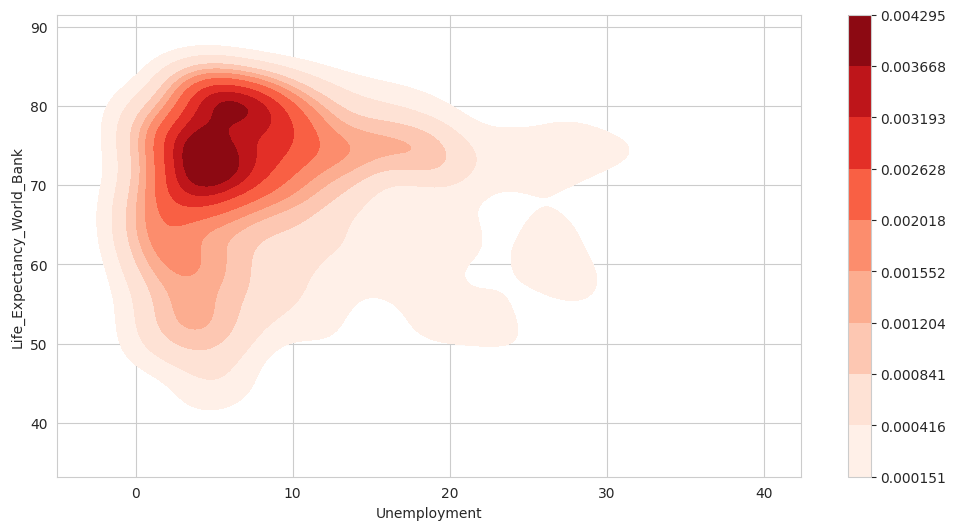

In [51]:
fig,ax= plt.subplots(figsize=(12,6))
sns.kdeplot(data=df,x='Unemployment',y='Life_Expectancy_World_Bank',cbar =True,cmap='Reds',shade=True)



<Axes: xlabel='Unemployment', ylabel='Life_Expectancy_World_Bank'>

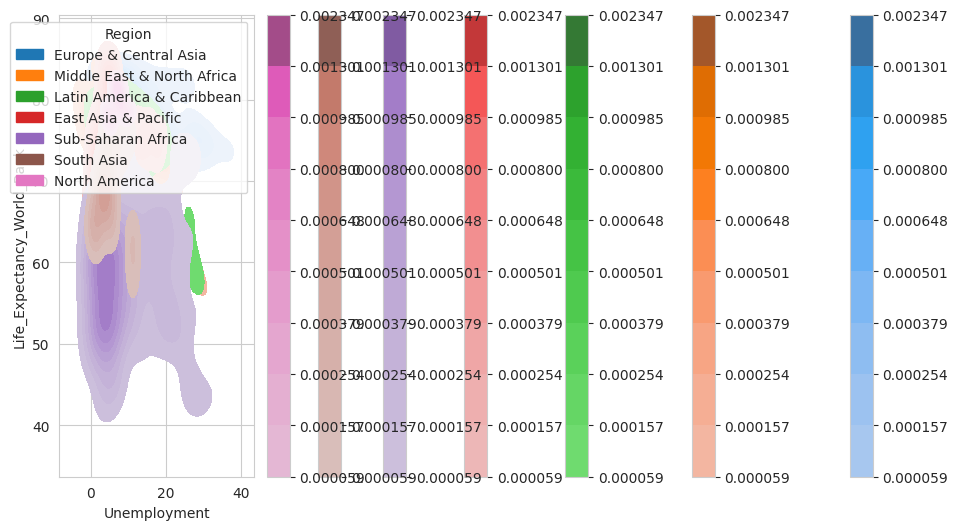

In [52]:
fig,ax=plt.subplots(figsize=(12,6))
sns.kdeplot(data=df,x='Unemployment',y='Life_Expectancy_World_Bank',hue='Region',cbar=True,cmap='Reds',shade=True)

In [ ]:
sns.jointplot(data=df,x='Unemployment',y='Life_Expectancy_World_Bank',kind = 'hex')

**Conclusion:** As we see that Unemployment rate is between 5% to 10%, it has more life expectancy between 70-80,we can conlcude that Unemployment in SSA region impact on Life expectancy.

## Sanitation

In [53]:
df['Sanitation'].describe()

count    3304.000000
mean       54.065093
std        29.747243
min         2.377647
25%        26.339479
50%        51.116409
75%        80.934722
max       100.000004
Name: Sanitation, dtype: float64

<Axes: xlabel='Sanitation', ylabel='Count'>

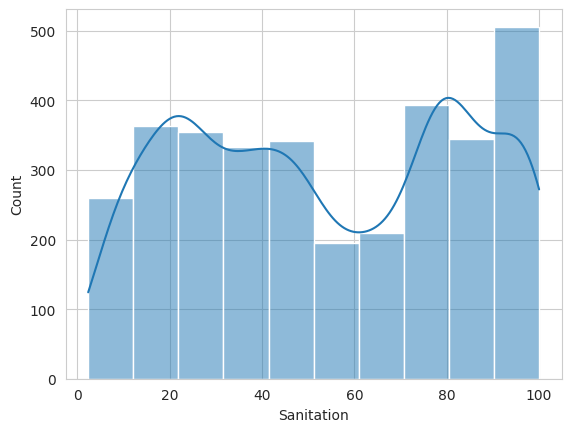

In [54]:
sns.histplot(data=df,x='Sanitation',bins=10,kde=True)

<Axes: xlabel='Sanitation', ylabel='Life_Expectancy_World_Bank'>

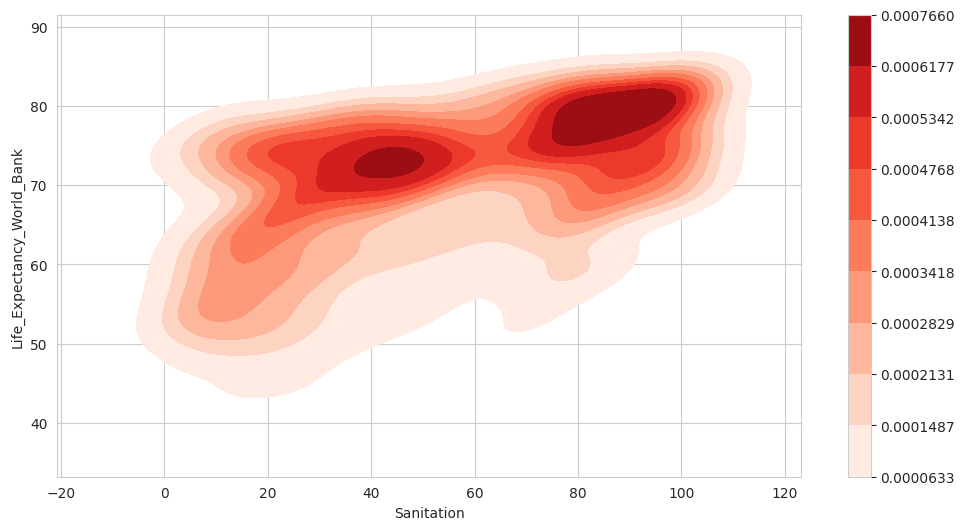

In [55]:
fig,ax=plt.subplots(figsize=(12,6))
sns.kdeplot(data=df,x='Sanitation',y='Life_Expectancy_World_Bank',cbar=True,cmap = 'Reds',shade=True)

<Axes: xlabel='Sanitation', ylabel='Life_Expectancy_World_Bank'>

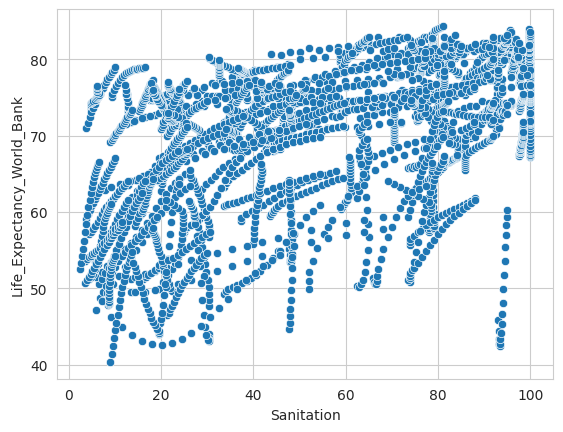

In [56]:
sns.scatterplot(data=df,x='Sanitation',y='Life_Expectancy_World_Bank')

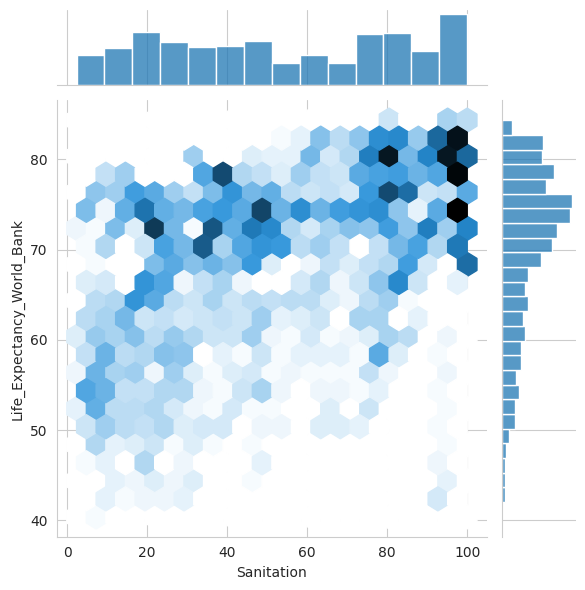

In [57]:
sns.jointplot(data=df,x='Sanitation',y='Life_Expectancy_World_Bank',kind='hex')

**Concluson:** As we can see that Sanitation between 60- 80, has more life expectancy

## Injuries

In [58]:
df['Injuries'] = np.log(df['Injuries'])

In [59]:
df['Injuries']

2       11.670627
3        7.437200
4       11.882267
5       14.150321
6       11.546087
          ...    
3301     9.432218
3302     8.802799
3303    14.970716
3304    13.144091
3305    13.376694
Name: Injuries, Length: 3304, dtype: float64

<Axes: xlabel='Injuries', ylabel='Count'>

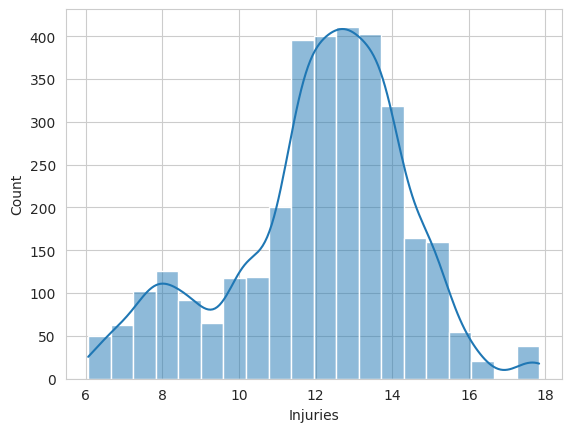

In [60]:
sns.histplot(data=df,x='Injuries',bins= 20,kde= True)

<Axes: xlabel='Injuries', ylabel='Life_Expectancy_World_Bank'>

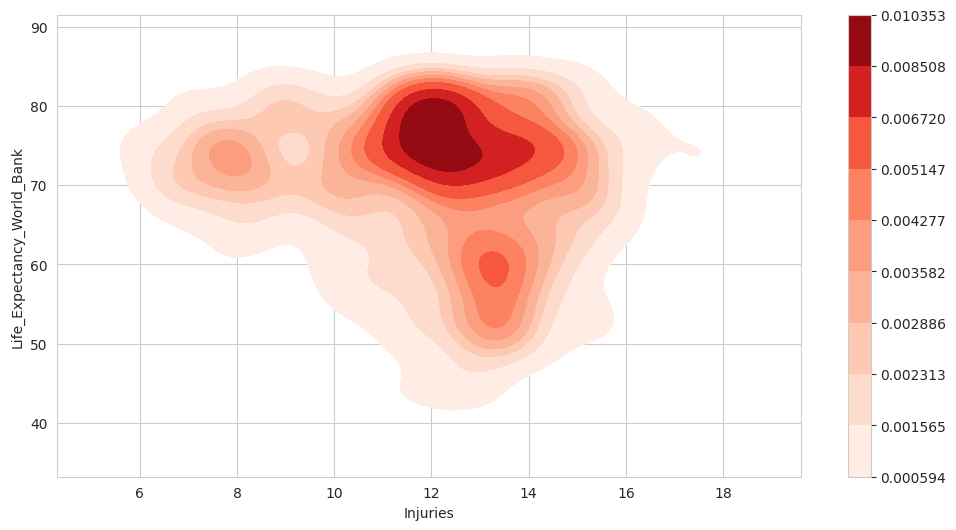

In [61]:
fig,ax = plt.subplots(figsize = (12,6))
sns.kdeplot(data=df,x='Injuries',y='Life_Expectancy_World_Bank',cbar=True,cmap='Reds',shade=True)

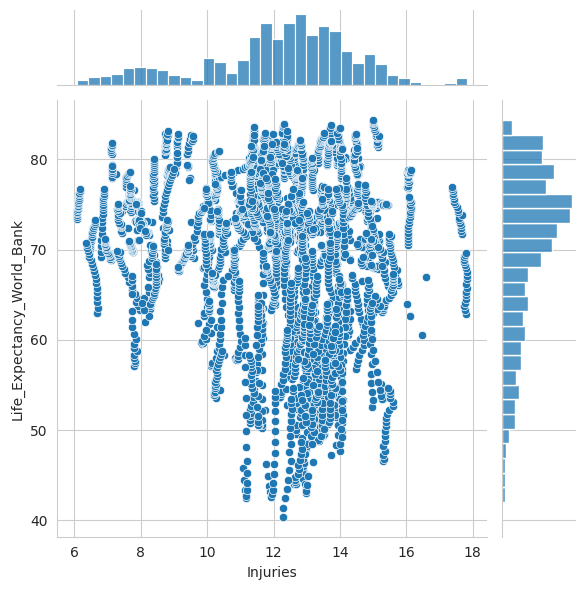

In [62]:
sns.jointplot(data=df,x='Injuries',y='Life_Expectancy_World_Bank')

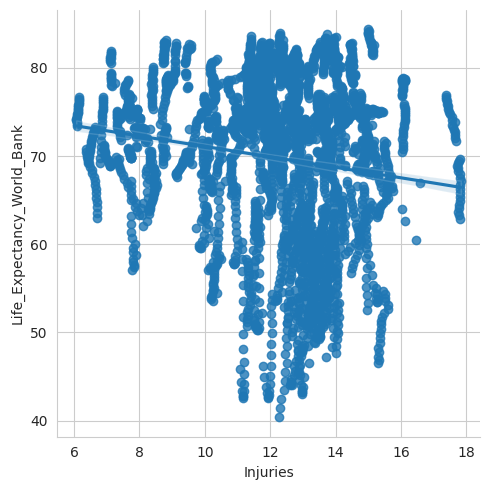

In [63]:
sns.lmplot(data=df,x='Injuries',y='Life_Expectancy_World_Bank')

**Conclusion:** We can see that injuries lies between 12 to 14 has more life expectancy of 70 - 80

## Communicable 

In [64]:
df['Communicable'] = np.log(df['Communicable'])

In [65]:
df['Communicable']

2       11.855769
3        6.544717
4       11.086317
5       14.225677
6       11.713726
          ...    
3301    10.167103
3302     9.115501
3303    16.395647
3304    15.391825
3305    15.247516
Name: Communicable, Length: 3304, dtype: float64

<Axes: xlabel='Communicable'>

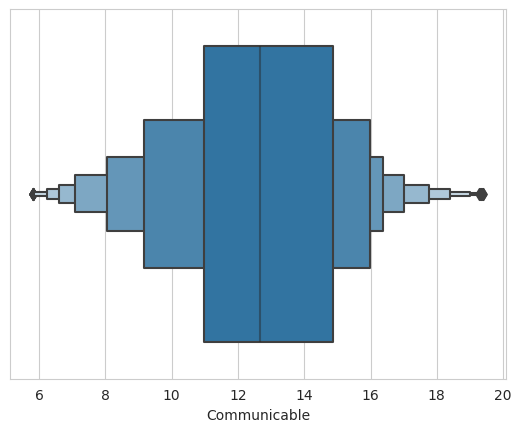

In [66]:
sns.boxenplot(data=df,x='Communicable')

<Axes: xlabel='Communicable', ylabel='Count'>

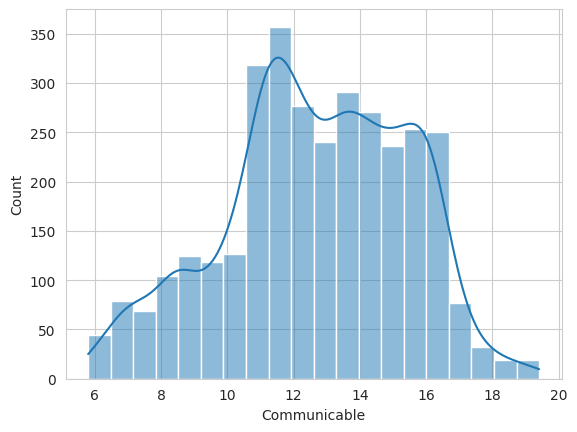

In [67]:
sns.histplot(data=df,x='Communicable',bins=20,kde=True)

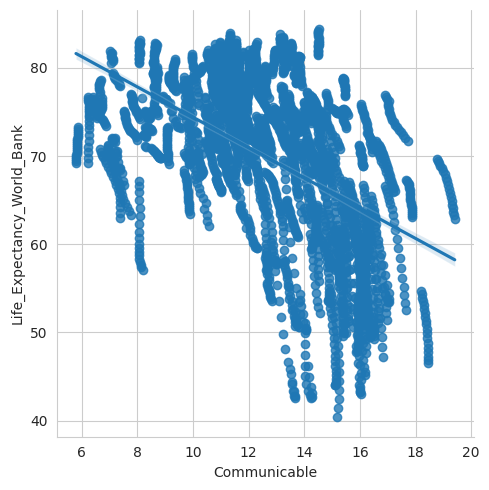

In [68]:
sns.lmplot(data=df,x='Communicable',y='Life_Expectancy_World_Bank')

<Axes: xlabel='Communicable', ylabel='Life_Expectancy_World_Bank'>

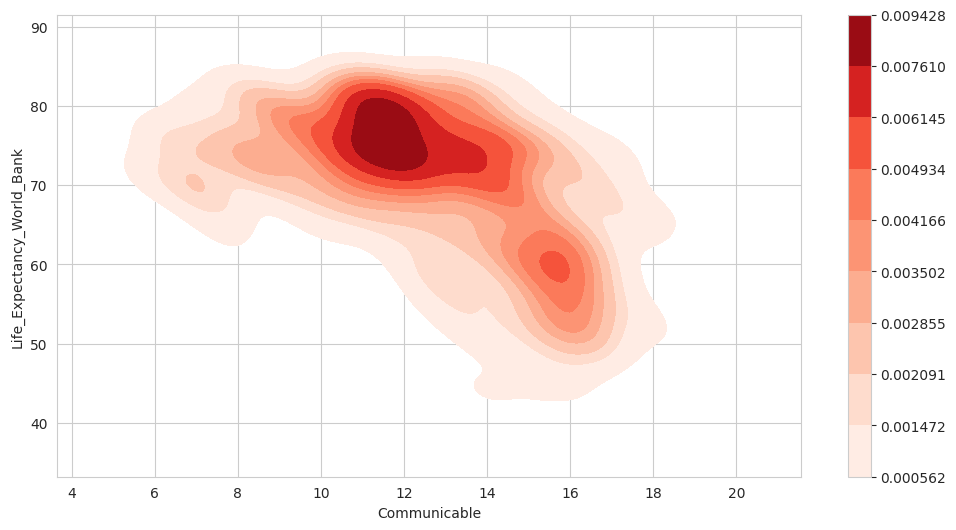

In [69]:
fig,ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=df,x='Communicable',y='Life_Expectancy_World_Bank',cbar=True,cmap='Reds',shade= True)

**Conclusion** : As we can see that spread of Communicable disease has less in between 12 to 14 ,so, there is an impact on the life expectancy as it is high.

## Non Communicable

In [71]:
df['NonCommunicable'] = np.log(df['NonCommunicable'])

In [72]:
df['NonCommunicable']

2       2.579081
3       2.253449
4       2.571479
5       2.766557
6       2.606493
          ...   
3301    2.410987
3302    2.369062
3303    2.781257
3304    2.693948
3305    2.686205
Name: NonCommunicable, Length: 3304, dtype: float64

<Axes: xlabel='NonCommunicable'>

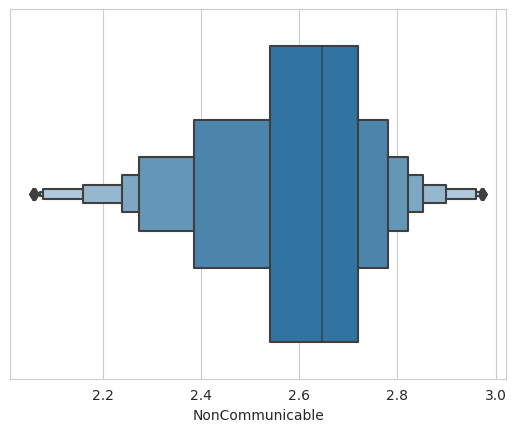

In [73]:
sns.boxenplot(data=df,x='NonCommunicable')

<Axes: xlabel='NonCommunicable', ylabel='Count'>

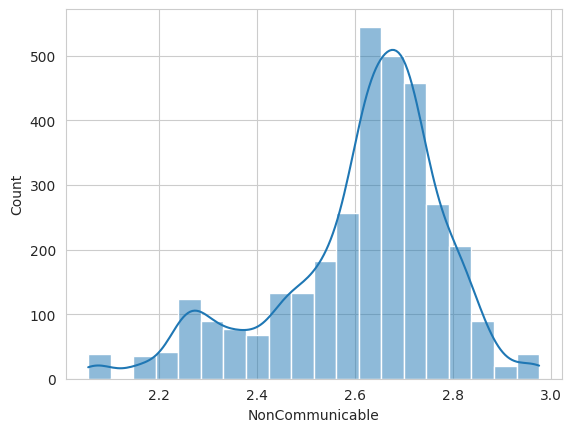

In [74]:
sns.histplot(data=df,x='NonCommunicable',bins = 20,kde= True)

<Axes: xlabel='NonCommunicable', ylabel='Life_Expectancy_World_Bank'>

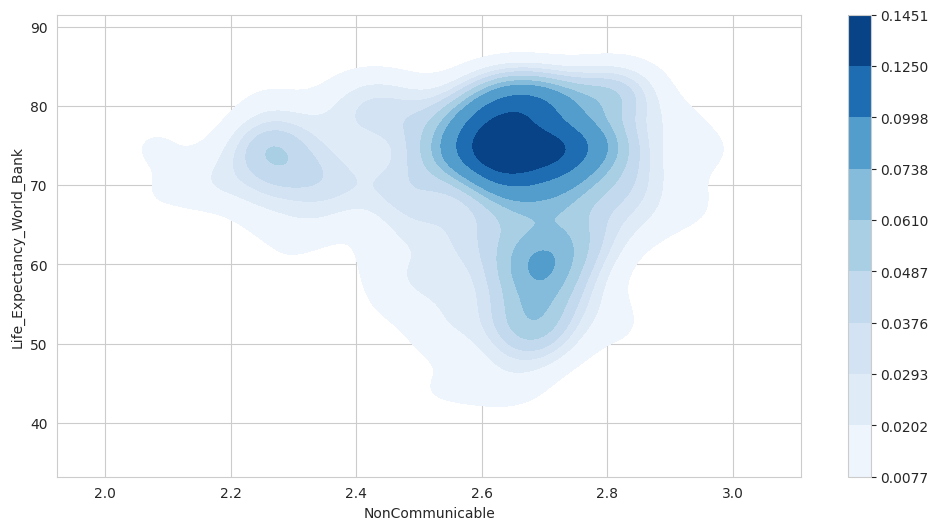

In [75]:
fig,ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=df,x='NonCommunicable',y='Life_Expectancy_World_Bank',cmap='Blues',cbar=True,shade=True)

<Axes: xlabel='NonCommunicable', ylabel='Life_Expectancy_World_Bank'>

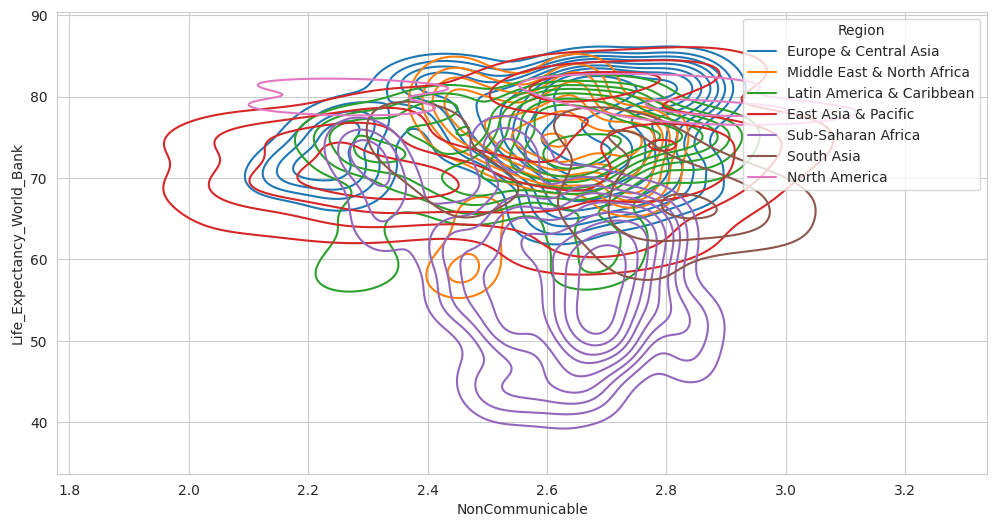

In [76]:
fig,ax = plt.subplots(figsize = (12,6))
sns.kdeplot(data=df,x='NonCommunicable',y='Life_Expectancy_World_Bank',hue= 'Region')

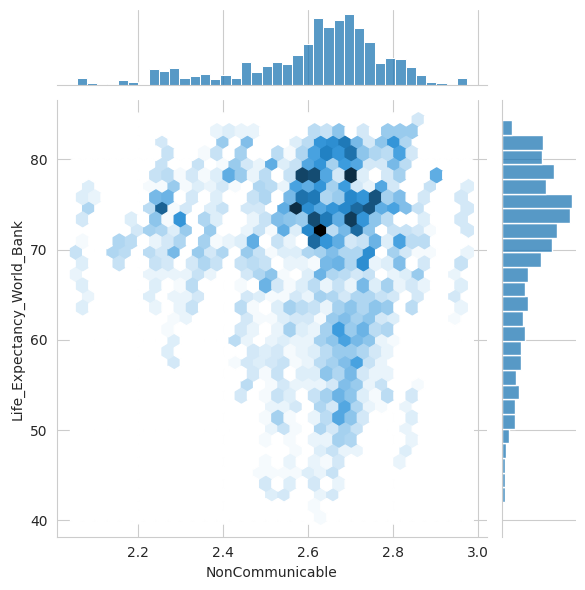

In [77]:
sns.jointplot(data=df,x='NonCommunicable',y='Life_Expectancy_World_Bank',kind ='hex')

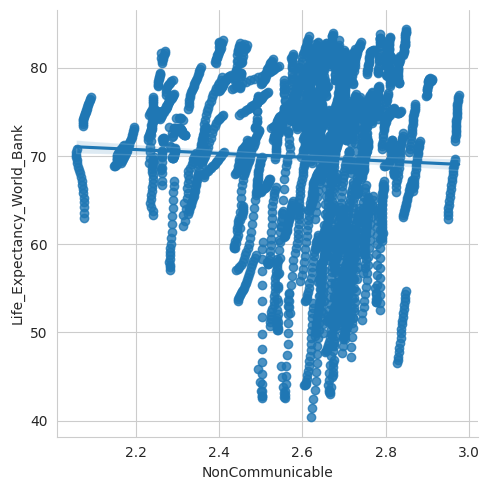

In [78]:
sns.lmplot(data=df,x='NonCommunicable',y='Life_Expectancy_World_Bank')

Conclusion: As we can see that Noncommunicable diesease has more life expetancy lies between 70-80 on other regions,whereas in the SSA Region there is a low life expectancy.


## Undernourishment 

In [79]:
df['Prevelance_of_Undernourishment'] = np.log(df['Prevelance_of_Undernourishment'])

In [80]:
df['Prevelance_of_Undernourishment']

2       1.589235
3       1.589235
4       1.029619
5       1.098612
6       3.261935
          ...   
3301    2.517696
3302    1.481605
3303    1.840550
3304    1.840550
3305    1.840550
Name: Prevelance_of_Undernourishment, Length: 3304, dtype: float64

In [81]:
df['Prevelance_of_Undernourishment'].describe()

count    3304.000000
mean        1.934070
std         0.895741
min         0.916291
25%         0.916291
50%         1.840550
75%         2.653242
max         4.261270
Name: Prevelance_of_Undernourishment, dtype: float64

<Axes: xlabel='Prevelance_of_Undernourishment', ylabel='Count'>

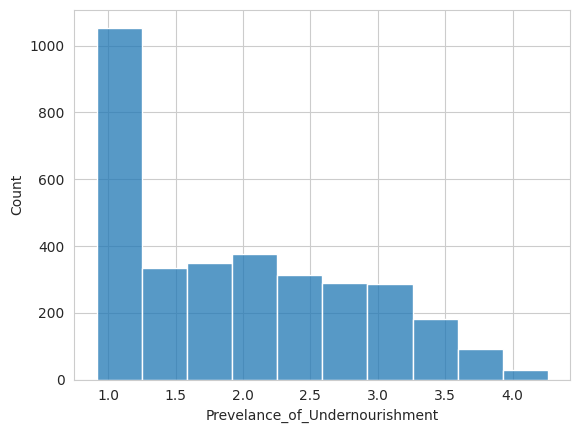

In [82]:
sns.histplot(data=df,x='Prevelance_of_Undernourishment',bins = 10)

<Axes: xlabel='Prevelance_of_Undernourishment'>

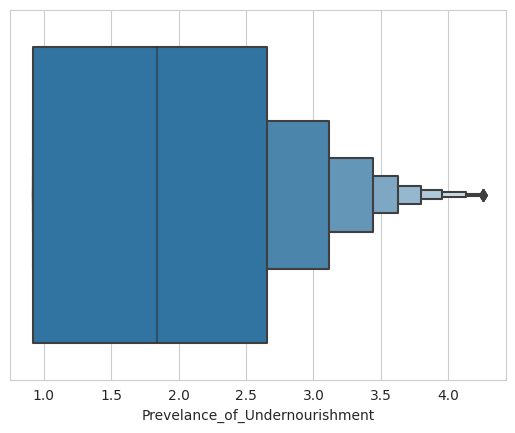

In [83]:
sns.boxenplot(data=df,x='Prevelance_of_Undernourishment')

<Axes: xlabel='Prevelance_of_Undernourishment', ylabel='Life_Expectancy_World_Bank'>

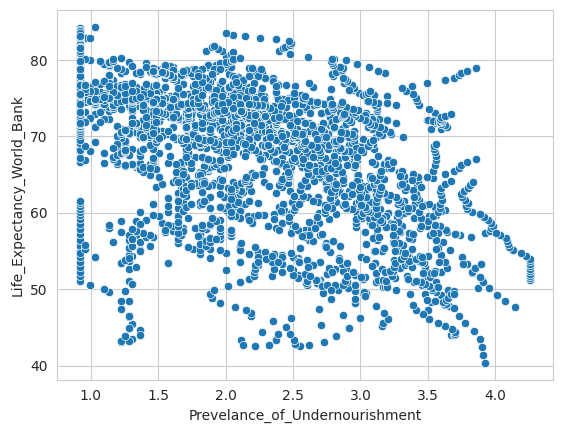

In [84]:
sns.scatterplot(data=df,x='Prevelance_of_Undernourishment',y='Life_Expectancy_World_Bank')

<Axes: xlabel='Prevelance_of_Undernourishment', ylabel='Life_Expectancy_World_Bank'>

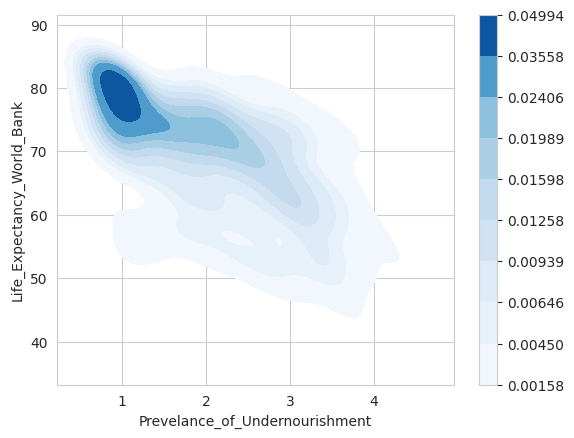

In [85]:
sns.kdeplot(data=df,x='Prevelance_of_Undernourishment',y='Life_Expectancy_World_Bank',cbar=True,cmap='Blues',shade= True)

**Conclusion**: Prevelance of Undernourishment disease lies between 1 to 2.5 has impact on life expectancy,

## Categorical Columns 

## Income Group

In [86]:
df['IncomeGroup'].value_counts(normalize=True,ascending =True)

IncomeGroup
Low income             0.131961
Lower middle income    0.258475
Upper middle income    0.281780
High income            0.327785
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x787f739e3070>,
 [Text(1.0068192270579879, 0.44307453552010406, 'Low income'),
  Text(-0.07733497478656376, 1.0972781332345787, 'Lower middle income'),
  Text(-1.078761658111324, -0.2151122613634733, 'Upper middle income'),
  Text(0.5665219449133766, -0.9428960101366244, 'High income')])

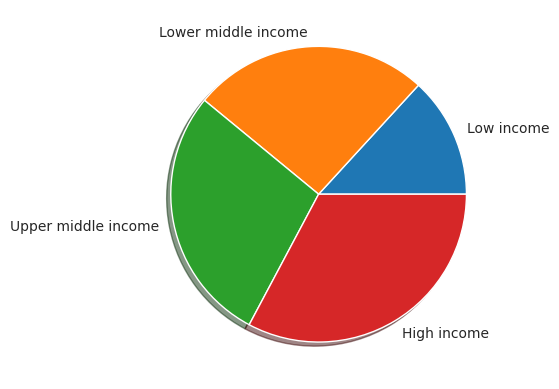

In [87]:
plt.pie(df['IncomeGroup'].value_counts(normalize=True,ascending = True),labels =['Low income','Lower middle income','Upper middle income','High income'],shadow =True)

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Count'>

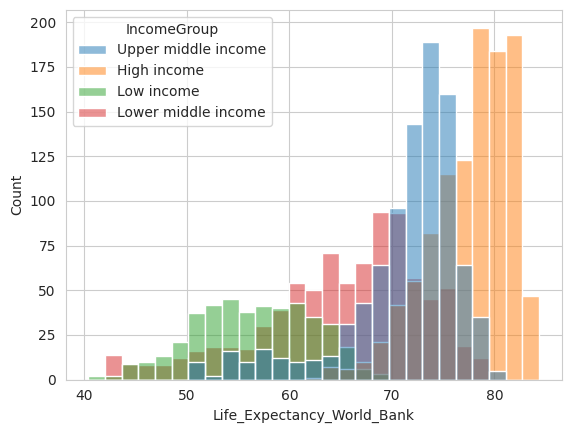

In [88]:
sns.histplot(data=df,hue='IncomeGroup',x='Life_Expectancy_World_Bank')

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Density'>

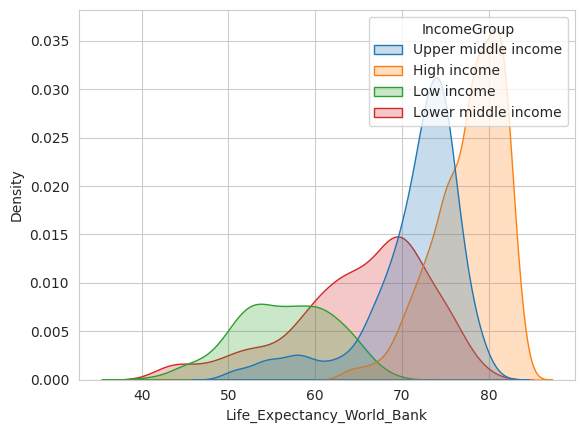

In [89]:
sns.kdeplot(data=df,hue='IncomeGroup',x='Life_Expectancy_World_Bank',shade=True)

**Conclusion** : As we can say that High Income and Upper middle income has High Life Expectancy

## Region

([<matplotlib.patches.Wedge at 0x787f73845750>,
 [Text(1.0983848021050169, 0.05958881190897446, 'Europe & Central Asia'),
  Text(1.0652643798429309, 0.2742477001505318, 'Middle East & North Africa'),
  Text(0.8521333043672412, 0.6956068081812936, 'Latin America & Caribbean'),
  Text(0.12004237020312308, 1.0934303038401745, 'East Asia & Pacific'),
  Text(-0.8632655273425603, 0.6817423481799935, 'Sub-Saharan Africa'),
  Text(-0.8760733145068823, -0.665203388152019, 'South Asia'),
  Text(0.7267209275632014, -0.8257582536321877, 'North America')])

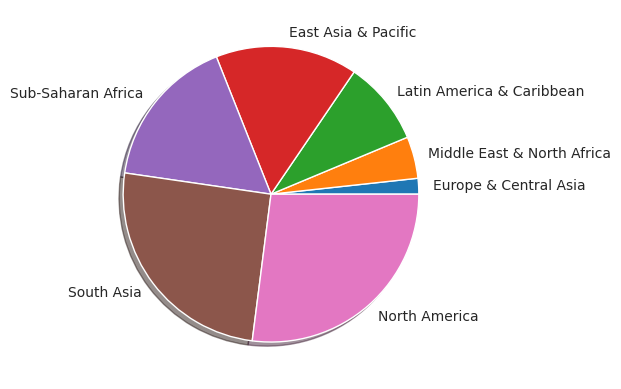

In [90]:
plt.pie(df['Region'].value_counts(normalize = True,ascending = True),labels = list(df['Region'].unique()), shadow = True)

<Axes: xlabel='Count', ylabel='Region'>

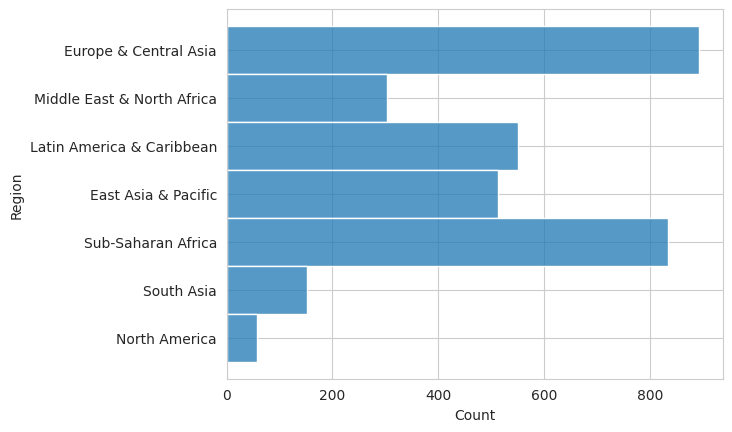

In [91]:
sns.histplot(data=df,y ='Region',bins =20)

[Text(0, 0, 'Europe & Central Asia'),
 Text(1, 0, 'Middle East & North Africa'),
 Text(2, 0, 'Latin America & Caribbean'),
 Text(3, 0, 'East Asia & Pacific'),
 Text(4, 0, 'Sub-Saharan Africa'),
 Text(5, 0, 'South Asia'),
 Text(6, 0, 'North America')]

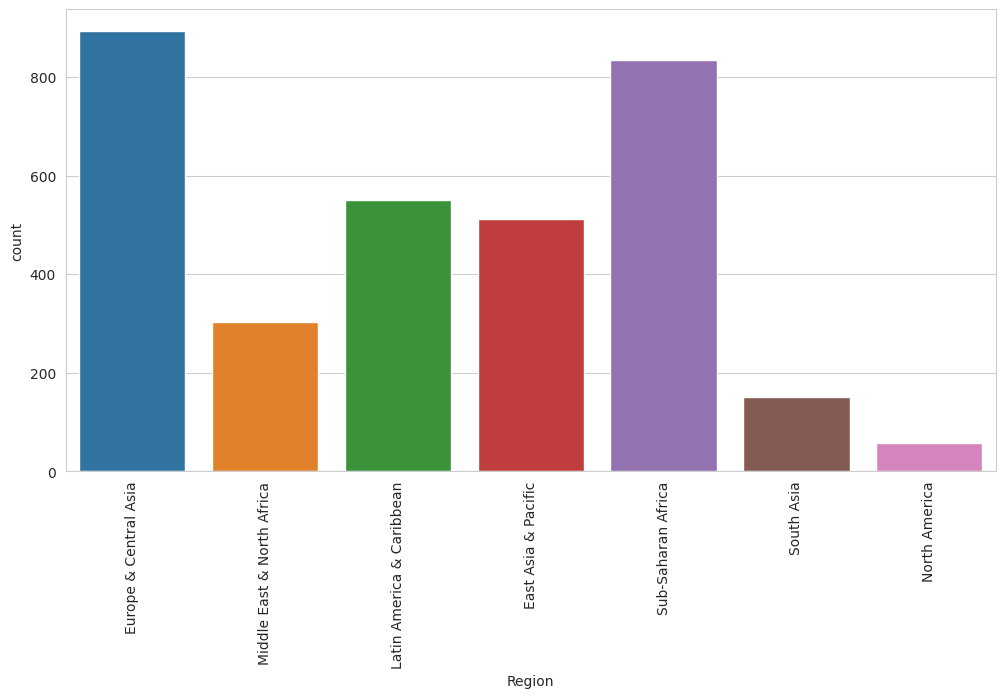

In [92]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(x='Region',data=df)
ax.set_xticklabels(df.Region.unique(),rotation= 90)

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Count'>

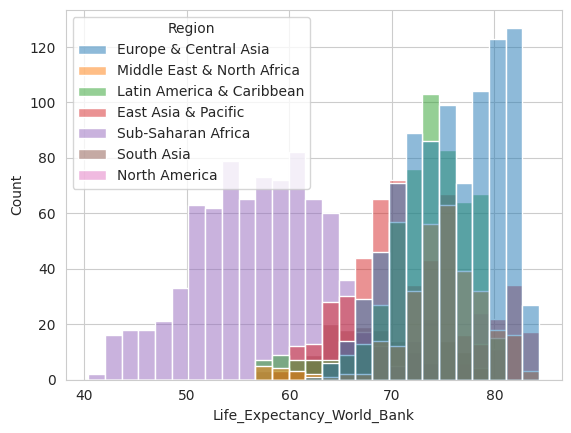

In [93]:
sns.histplot(data=df,hue='Region',x='Life_Expectancy_World_Bank')

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Density'>

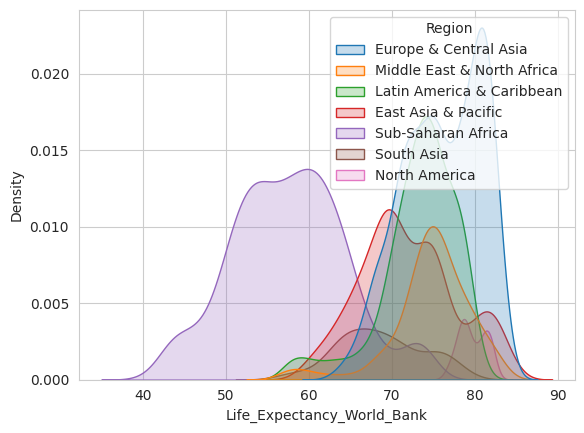

In [94]:
sns.kdeplot(data=df,hue='Region',x='Life_Expectancy_World_Bank',shade = True)

[Text(30.0, 0, 'Europe & Central Asia'),
 Text(40.0, 0, 'Middle East & North Africa'),
 Text(50.0, 0, 'Latin America & Caribbean'),
 Text(60.0, 0, 'East Asia & Pacific'),
 Text(70.0, 0, 'Sub-Saharan Africa'),
 Text(80.0, 0, 'South Asia'),
 Text(90.0, 0, 'North America')]

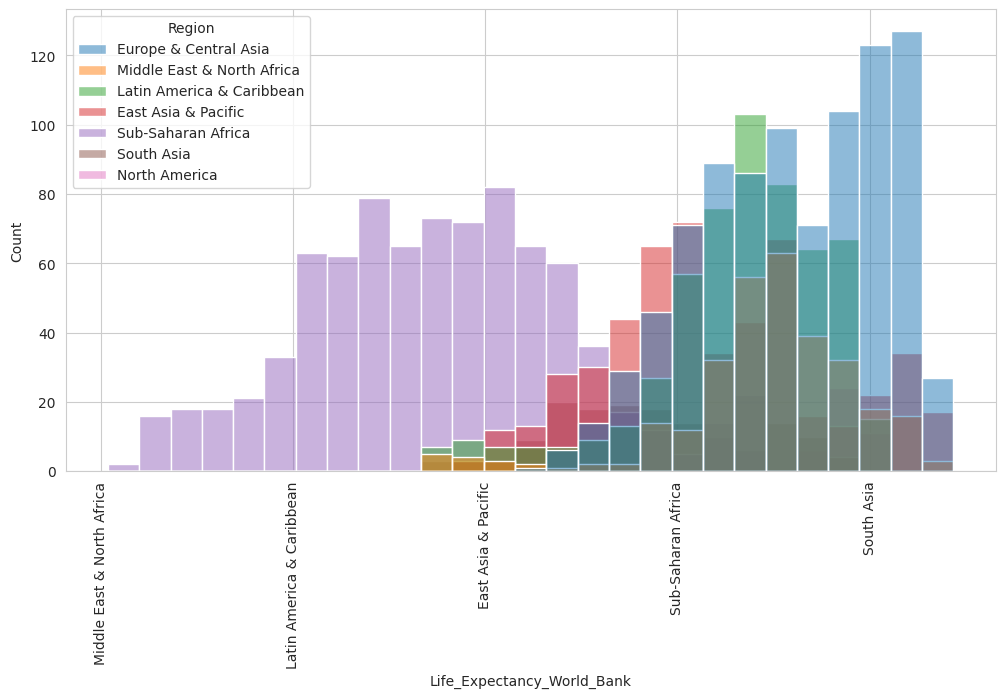

In [95]:
fig,ax= plt.subplots(figsize=(12,6))
sns.histplot(data=df,hue='Region',x='Life_Expectancy_World_Bank')
ax.set_xticklabels(df.Region.unique(),rotation = 90)

**Conlusion:** We can conclude that by seeing the plot, '**SSA Region**' has '**low life expectancy**' and '**Europe & central Asia**' has '**High Life Expectancy**'.

'**SSA Region**' considered has '**lowest earnings**' in terms of '**GDP**' from other '**Regions**'. Therefore, there is a scope for improvement in '**life Expectancy in SSA Region**'.

## Correlation

In [96]:
df.select_dtypes(exclude = 'O').corr()

Year  Life_Expectancy_World_Bank  \
Year                            1.000000                    0.202891   
Life_Expectancy_World_Bank      0.202891                    1.000000   
Prevelance_of_Undernourishment -0.149192                   -0.615143   
CO2                             0.060349                    0.439152   
Health_Expenditure_%            0.100433                    0.280917   
Education_Expenditure_%         0.052081                    0.151409   
Unemployment                   -0.034297                   -0.039193   
Sanitation                      0.113762                    0.485413   
Injuries                        0.002929                   -0.146189   
Communicable                   -0.034409                   -0.516135   
NonCommunicable                 0.036044                   -0.040236   

                                Prevelance_of_Undernourishment       CO2  \
Year                                                 -0.149192  0.060349   
Life_Expectancy_World_Bank                           -0.615143  0.439152   
Prevelance_of_Undernourishment                        1.000000 -0.348226   
CO2                                                  -0.348226  1.000000   
Health_Expenditure_%                                 -0.315249 -0.029368   
Education_Expenditure_%                              -0.194814 -0.071729   
Unemployment                                         -0.074405 -0.116568   
Sanitation                                           -0.392344  0.298401   
Injuries                                              0.095823  0.666435   
Communicable                                          0.376259  0.350637   
NonCommunicable                                      -0.007433  0.718202   

                                Health_Expenditure_%  Education_Expenditure_%  \
Year                                        0.100433                 0.052081   
Life_Expectancy_World_Bank                  0.280917                 0.151409   
Prevelance_of_Undernourishment             -0.315249                -0.194814   
CO2                                        -0.029368                -0.071729   
Health_Expenditure_%                        1.000000                 0.251314   
Education_Expenditure_%                     0.251314                 1.000000   
Unemployment                                0.102094                 0.117596   
Sanitation                                  0.060647                 0.101149   
Injuries                                   -0.119015                -0.150840   
Communicable                               -0.224384                -0.195929   
NonCommunicable                            -0.092865                -0.136353   

                                Unemployment  Sanitation  Injuries  \
Year                               -0.034297    0.113762  0.002929   
Life_Expectancy_World_Bank         -0.039193    0.485413 -0.146189   
Prevelance_of_Undernourishment     -0.074405   -0.392344  0.095823   
CO2                                -0.116568    0.298401  0.666435   
Health_Expenditure_%                0.102094    0.060647 -0.119015   
Education_Expenditure_%             0.117596    0.101149 -0.150840   
Unemployment                        1.000000   -0.024343 -0.195984   
Sanitation                         -0.024343    1.000000 -0.087434   
Injuries                           -0.195984   -0.087434  1.000000   
Communicable                       -0.203412   -0.299580  0.892438   
NonCommunicable                    -0.186438   -0.017811  0.977927   

                                Communicable  NonCommunicable  
Year                               -0.034409         0.036044  
Life_Expectancy_World_Bank         -0.516135        -0.040236  
Prevelance_of_Undernourishment      0.376259        -0.007433  
CO2                                 0.350637         0.718202  
Health_Expenditure_%               -0.224384        -0.092865  
Education_Expenditure_%            -0.195929        -0.13635

<Axes: >

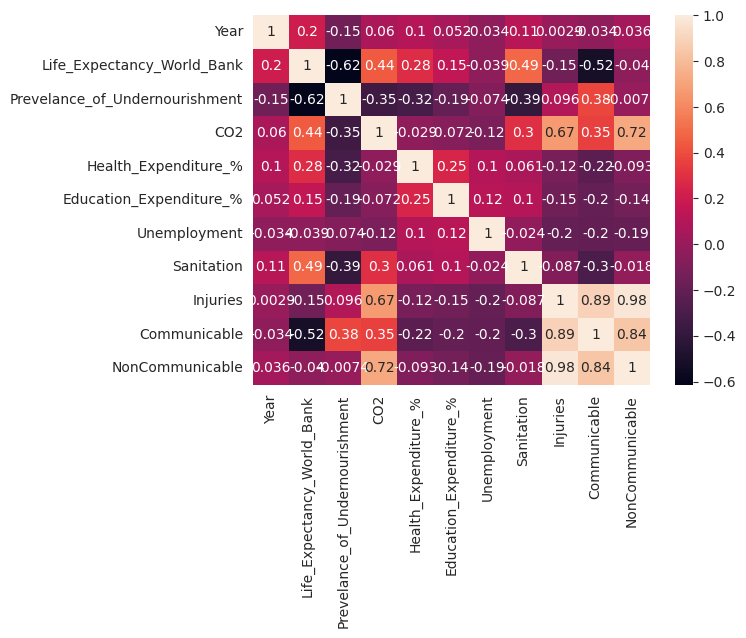

In [97]:
sns.heatmap(df.select_dtypes(exclude = 'O').corr(),annot = True)


There is a '**High correlation**' between '**Injuries**','**NonCommunicable**' & '**CO2**'. 

In [102]:
df.drop(['Country_Name','Country_Code'],axis =1,inplace = True)

In [103]:
df #desired output

Region          IncomeGroup  Year  \
2          Europe & Central Asia  Upper middle income  2001   
3          Europe & Central Asia          High income  2001   
4     Middle East & North Africa          High income  2001   
5      Latin America & Caribbean  Upper middle income  2001   
6          Europe & Central Asia  Upper middle income  2001   
...                          ...                  ...   ...   
3301         East Asia & Pacific  Lower middle income  2019   
3302         East Asia & Pacific  Lower middle income  2019   
3303          Sub-Saharan Africa  Upper middle income  2019   
3304          Sub-Saharan Africa           Low income  2019   
3305          Sub-Saharan Africa  Lower middle income  2019   

      Life_Expectancy_World_Bank  Prevelance_of_Undernourishment        CO2  \
2                         74.288                        1.589235   8.080237   
3                         74.288                        1.589235   6.253829   
4                         74.544                        1.029619  11.484526   
5                         73.755                        1.098612  11.738147   
6                         71.800                        3.261935   8.188689   
...                          ...                             ...        ...   
3301                      70.474                        2.517696   5.347107   
3302                      73.321                        1.481605   5.703783   
3303                      64.131                        1.840550  12.993712   
3304                      63.886                        1.840550   8.824678   
3305                      61.490                        1.840550   9.372459   

      Health_Expenditure_%  Education_Expenditure_%  Unemployment  Sanitation  \
2                 7.139524                  3.45870     18.575001   40.520895   
3                 5.865939                  3.45870     18.575001   21.788660   
4                 2.484370                  3.45870      2.493000   21.788660   
5                 8.371798                  4.83374     17.320000   48.053996   
6                 4.645627                  2.46944     10.912000   46.351896   
...                    ...                      ...           ...         ...   
3301              3.360347                  1.77788      1.801000   98.275223   
3302              6.363094                  4.70625      8.406000   47.698788   
3303              9.109355                  5.91771     28.469999   47.698788   
3304              5.312203                  4.46518     12.520000   47.698788   
3305              7.703565                  4.46518      4.833000   25.963544   

       Injuries  Communicable  NonCommunicable  
2     11.670627     11.855769         2.579081  
3      7.437200      6.544717         2.253449  
4     11.882267     11.086317         2.571479  
5     14.150321     14.225677         2.766557  
6     11.546087     11.713726         2.606493  
...         ...           ...              ...  
3301   9.432218     10.167103         2.410987  
3302   8.802799      9.115501         2.369062  
3303  14.970716     16.395647         2.781257  
3304  13.144091     15.391825         2.693948  
3305  13.376694     15.247516         2.686205  

[3304 rows x 13 columns]

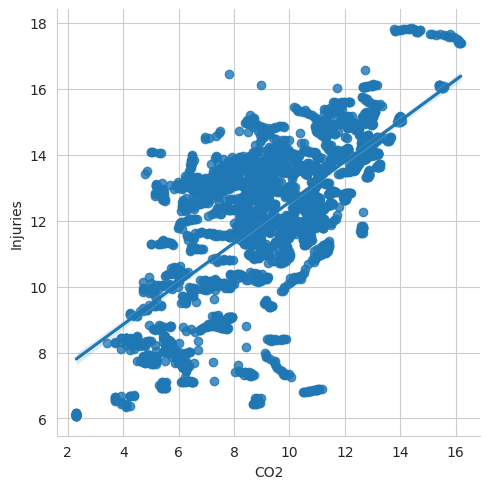

In [104]:
sns.lmplot(data=df,x='CO2',y='Injuries')

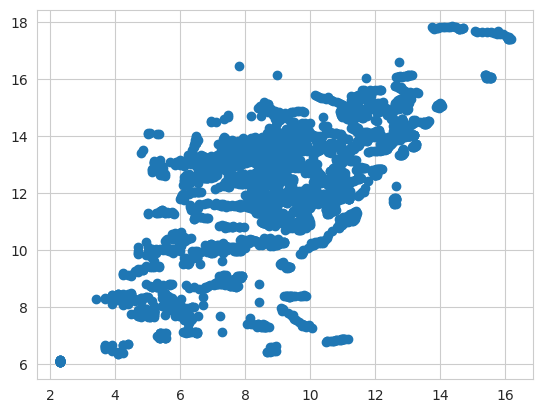

In [100]:
plt.scatter(data=df,x='CO2',y ='Injuries')

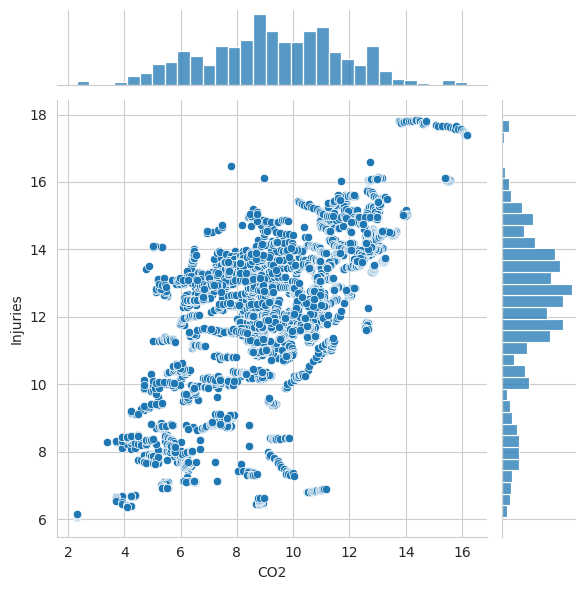

In [105]:
sns.jointplot(data=df, x='CO2',y='Injuries')

                   The End of Life Expectancy EDA